# Description
Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

# Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# 1. Load libraries

In [ ]:
# Importing library

import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sns
import missingno           as msno
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display 3 numbers in digits
from uszipcode import SearchEngine # To use the state and county if there is a need

from sklearn.model_selection import train_test_split # Test and Train Split
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn                 import metrics
from sklearn                 import tree
from sklearn.metrics         import confusion_matrix, classification_report # Confusion Matrix
from sklearn.metrics         import accuracy_score,precision_score,recall_score,f1_score # Accuracy and all other
from sklearn.metrics         import roc_auc_score, roc_curve,precision_recall_curve
# To build linear model for statistical analysis and prediction
import statsmodels.stats.api   as sms
from   statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
from   statsmodels.tools.tools import add_constant

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# 2. Loading and Exploring the Data

In [2]:
# Read data from input file
df = pd.read_csv('Loan_Modelling.csv',index_col = 0 )
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

There are 5000 rows and 13 columns.


In [3]:
# Top 5 records.
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49    91107       4  1.600          1         0   
2    45          19      34    90089       3  1.500          1         0   
3    39          15      11    94720       1  1.000          1         0   
4    35           9     100    94112       1  2.700          2         0   
5    35           8      45    91330       4  1.000          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                     
1               0                   1           0       0           0  
2               0                   1           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           0  
5               0                   0           0       0           1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


- There are 5000 observations and 13 columns in the given dataset
- it looks like we do not have any missed values

In [5]:
# Conversion of Integer to Category data type
# df['ZIPCode'] = df['ZIPCode'].astype('category')
# df['Family'] = df['Family'].astype('category')

- ZipCode and Family can be category , rather than an integer

In [6]:
print('Percentage of missing values - ')
print(round(df.isna().sum() / df.isna().count()))

Percentage of missing values - 
Age                  0.000
Experience           0.000
Income               0.000
ZIPCode              0.000
Family               0.000
CCAvg                0.000
Education            0.000
Mortgage             0.000
Personal_Loan        0.000
Securities_Account   0.000
CD_Account           0.000
Online               0.000
CreditCard           0.000
dtype: float64


- We do not have any missing values in the dataset.

In [7]:
# Unique Values
df.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

- In the dataset we have 45 unique Age groups.
- Maximum family members are 4
- ZIP Code of 467 locations were available in the dataset.

In [8]:
df.describe().T

count      mean      std       min       25%       50%  \
Age                5000.000    45.338   11.463    23.000    35.000    45.000   
Experience         5000.000    20.105   11.468    -3.000    10.000    20.000   
Income             5000.000    73.774   46.034     8.000    39.000    64.000   
ZIPCode            5000.000 93169.257 1759.455 90005.000 91911.000 93437.000   
Family             5000.000     2.396    1.148     1.000     1.000     2.000   
CCAvg              5000.000     1.938    1.748     0.000     0.700     1.500   
Education          5000.000     1.881    0.840     1.000     1.000     2.000   
Mortgage           5000.000    56.499  101.714     0.000     0.000     0.000   
Personal_Loan      5000.000     0.096    0.295     0.000     0.000     0.000   
Securities_Account 5000.000     0.104    0.306     0.000     0.000     0.000   
CD_Account         5000.000     0.060    0.238     0.000     0.000     0.000   
Online             5000.000     0.597    0.491     0.000     0.000     1.000   
CreditCard         5000.000     0.294    0.456     0.000     0.000     0.000   

                         75%       max  
Age                   55.000    67.000  
Experience            30.000    43.000  
Income                98.000   224.000  
ZIPCode            94608.000 96651.000  
Family                 3.000     4.000  
CCAvg                  2.500    10.000  
Education              3.000     3.000  
Mortgage             101.000   635.000  
Personal_Loan          0.000     1.000  
Securities_Account     0.000     1.000  
CD_Account             0.000     1.000  
Online                 1.000     1.000  
CreditCard             1.000     1.000

- Mean age is 45. it shows that the data is across all the age groups
- For couple of records minimum experience is negative , those rows need further data processing. Maximum experience is 43
- Minimum income is 8K and maximum income is 224K , Mean income of the given dataset is 73k with Standard deviation of 46K. That indicates data has skewness.
- In the given dataset we do not have uneducated at all , minimum education is Undergrade.
- Some people in the dataset did not take Mortgage, Personal_Loan , Securities_Account and CD_Account
- Some folks do not use Online and some do not have credit cards also.

In [9]:
data = df[df['Experience'] < 0]
data

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                           
90     25          -1     113    94303       4  2.300          3         0   
227    24          -1      39    94085       2  1.700          2         0   
316    24          -2      51    90630       3  0.300          3         0   
452    28          -2      48    94132       2  1.750          3        89   
525    24          -1      75    93014       4  0.200          1         0   
537    25          -1      43    92173       3  2.400          2       176   
541    25          -1     109    94010       4  2.300          3       314   
577    25          -1      48    92870       3  0.300          3         0   
584    24          -1      38    95045       2  1.700          2         0   
598    24          -2     125    92835       2  7.200          1         0   
650    25          -1      82    92677       4  2.100          3         0   
671    23          -1      61    92374       4  2.600          1       239   
687    24          -1      38    92612       4  0.600          2         0   
794    24          -2     150    94720       2  2.000          1         0   
890    24          -2      82    91103       2  1.600          3         0   
910    23          -1     149    91709       1  6.330          1       305   
1174   24          -1      35    94305       2  1.700          2         0   
1429   25          -1      21    94583       4  0.400          1        90   
1523   25          -1     101    94720       4  2.300          3       256   
1906   25          -1     112    92507       2  2.000          1       241   
2103   25          -1      81    92647       2  1.600          3         0   
2431   23          -1      73    92120       4  2.600          1         0   
2467   24          -2      80    94105       2  1.600          3         0   
2546   25          -1      39    94720       3  2.400          2         0   
2619   23          -3      55    92704       3  2.400          2       145   
2718   23          -2      45    95422       4  0.600          2         0   
2849   24          -1      78    94720       2  1.800          2         0   
2877   24          -2      80    91107       2  1.600          3       238   
2963   23          -2      81    91711       2  1.800          2         0   
2981   25          -1      53    94305       3  2.400          2         0   
3077   29          -1      62    92672       2  1.750          3         0   
3131   23          -2      82    92152       2  1.800          2         0   
3158   23          -1      13    94720       4  1.000          1        84   
3280   26          -1      44    94901       1  2.000          2         0   
3285   25          -1     101    95819       4  2.100          3         0   
3293   25          -1      13    95616       4  0.400          1         0   
3395   25          -1     113    90089       4  2.100          3         0   
3426   23          -1      12    91605       4  1.000          1        90   
3627   24          -3      28    90089       4  1.000          3         0   
3797   24          -2      50    94920       3  2.400          2         0   
3825   23          -1      12    95064       4  1.000          1         0   
3888   24          -2     118    92634       2  7.200          1         0   
3947   25          -1      40    93117       3  2.400          2         0   
4016   25          -1     139    93106       2  2.000          1         0   
4089   29          -1      71    94801       2  1.750          3         0   
4117   24          -2     135    90065       2  7.200          1         0   
4286   23          -3     149    93555       2  7.200          1         0   
4412   23          -2      75    90291       2  1.800          2         0   
4482   25          -2      35    95045       4  1.000          3         0   
4515   24          -3      4

- Experience is negative for all these data observations. Data Preprocessing is required for all these onservations.

In [10]:
data.shape

(52, 13)

In [11]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- We do not have any missing values in the data

In [12]:
# Group by Age 
df.groupby(by=["Age"]).size()

Age
23     12
24     28
25     53
26     78
27     91
28    103
29    123
30    136
31    125
32    120
33    120
34    134
35    151
36    107
37    106
38    115
39    133
40    125
41    136
42    126
43    149
44    121
45    127
46    127
47    113
48    118
49    115
50    138
51    129
52    145
53    112
54    143
55    125
56    135
57    132
58    143
59    132
60    127
61    122
62    123
63    108
64     78
65     80
66     24
67     12
dtype: int64

In [13]:
# Group by Age 
df.groupby(by=["Family"]).size()

Family
1    1472
2    1296
3    1010
4    1222
dtype: int64

In [14]:
# looking at value counts for non-numeric features
num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n') # just for more space between 

In [15]:
# looking at value counts for non-numeric features
num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n') # just for more space between 

- No Object datatype in the given dataset

# 3. EDA

In [16]:
# Function for  Histogram and boxplot to analyze each and every variable
def hist_box(feature,figsize=(15,10),bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.20, .80)}, 
                                           figsize = figsize ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True) # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, rug=True,ax=ax_hist2, bins=bins,color='g') if bins else sns.distplot(feature, kde=True,rug=True,ax=ax_hist2,color='r') # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

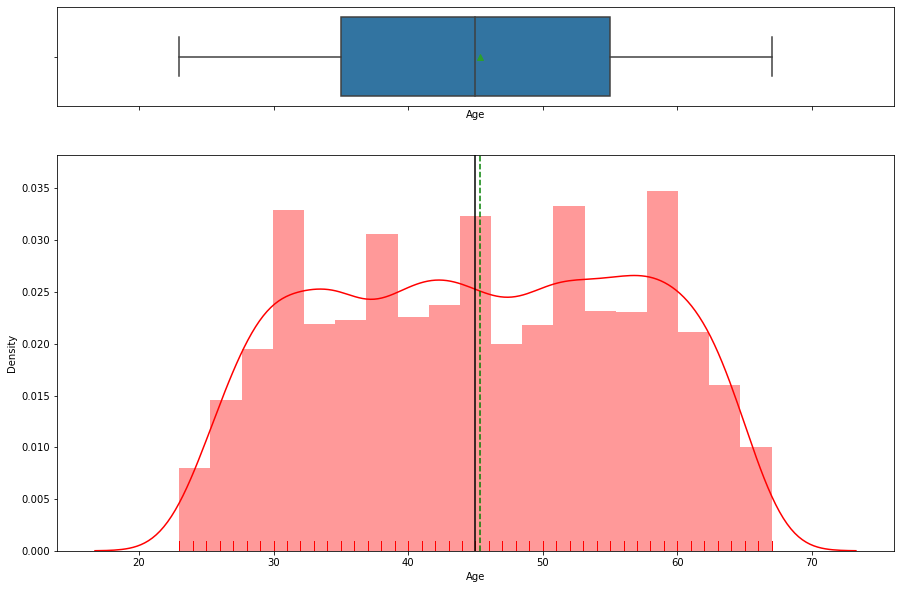

In [17]:
hist_box(df.Age)

- Minimum Age is 23 , where as maximum is 67
- Distribution of data does not look normal.

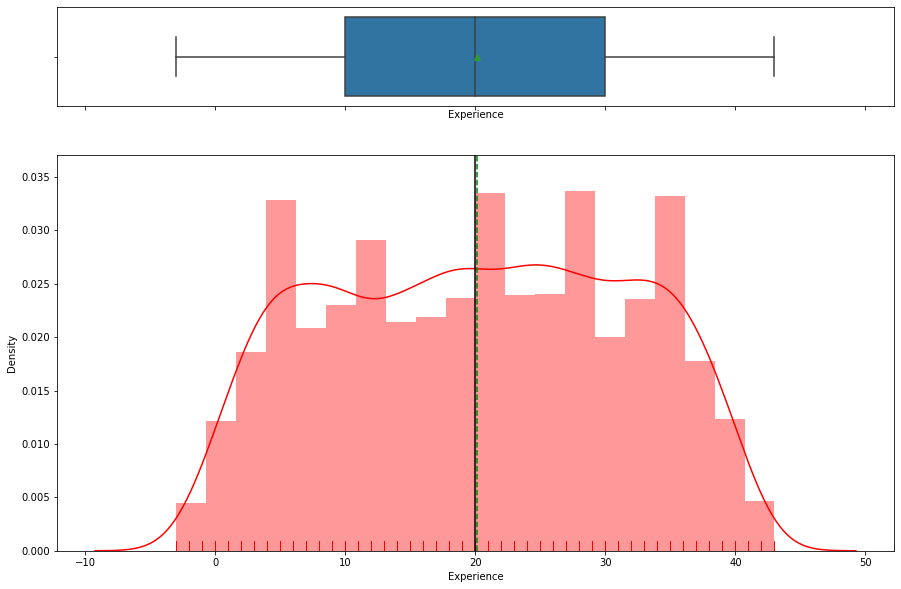

In [18]:
hist_box(df.Experience)

- Mean experience is 20 , In the given dataset we do have negative value those are supposed to be pre processed
- Max is 43 , date is not normally distributed.

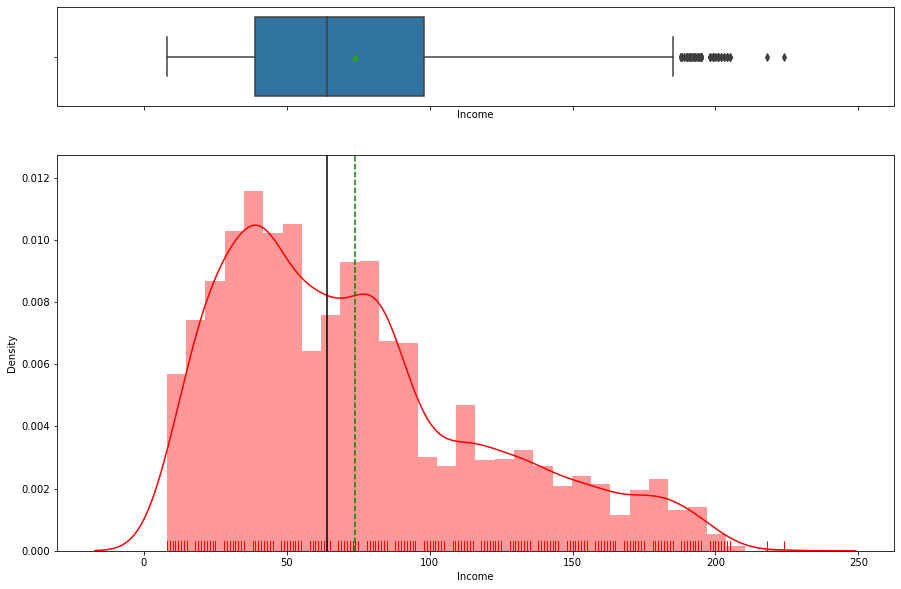

In [19]:
hist_box(df.Income)

- Mean income is 73K , Max income is 224K. 
- Majority of the data observations are towards left side , so left skew data.

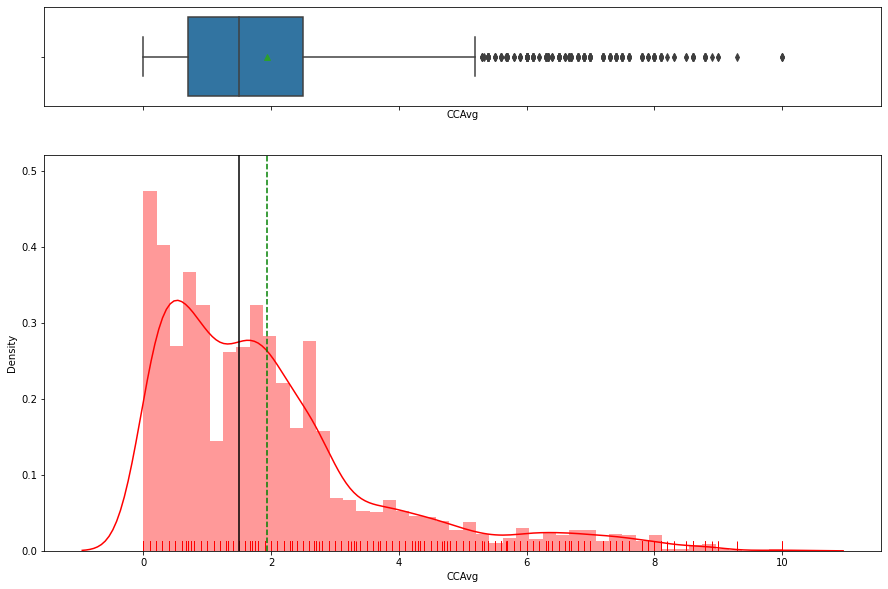

In [20]:
hist_box(df.CCAvg)

- Average spending on credit card is 1.9 K , Max value is 10K
- Data is left skewed

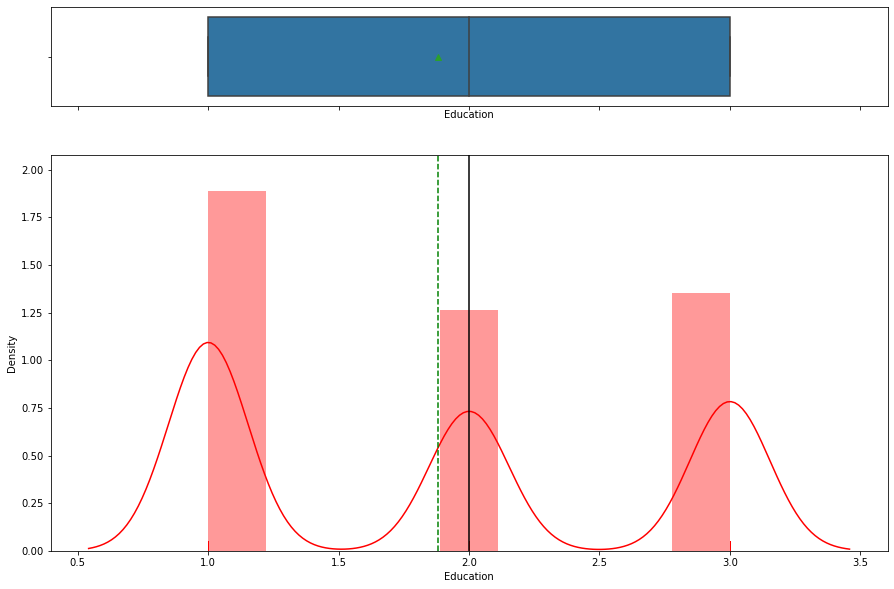

In [21]:
hist_box(df.Education)

- Minimum education is Undergrad
- People with Advanced/Professional degree are also available in the given dataset , but their volume is less.

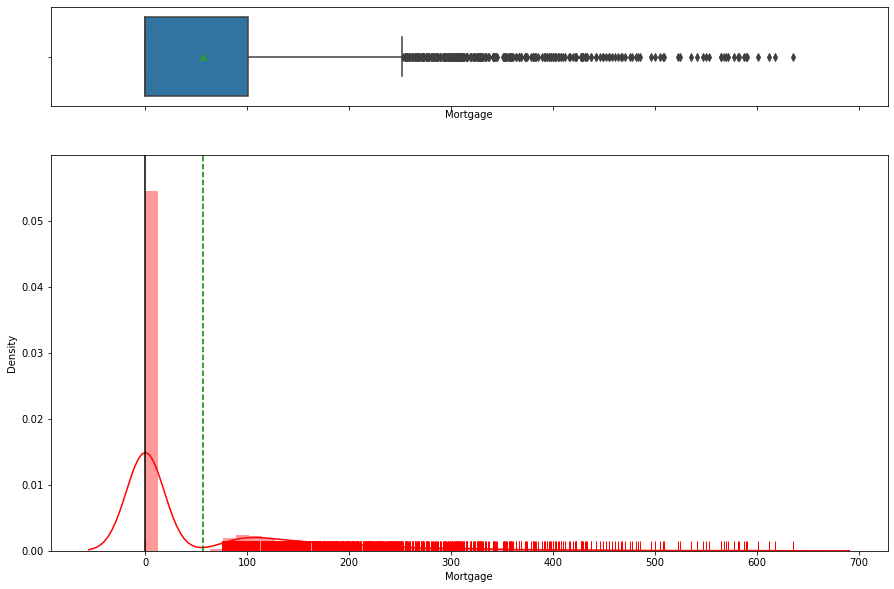

In [22]:
hist_box(df.Mortgage)

- Mean mortgage is 56.4K , Max is 635K 
- We do have out layers in the dataset

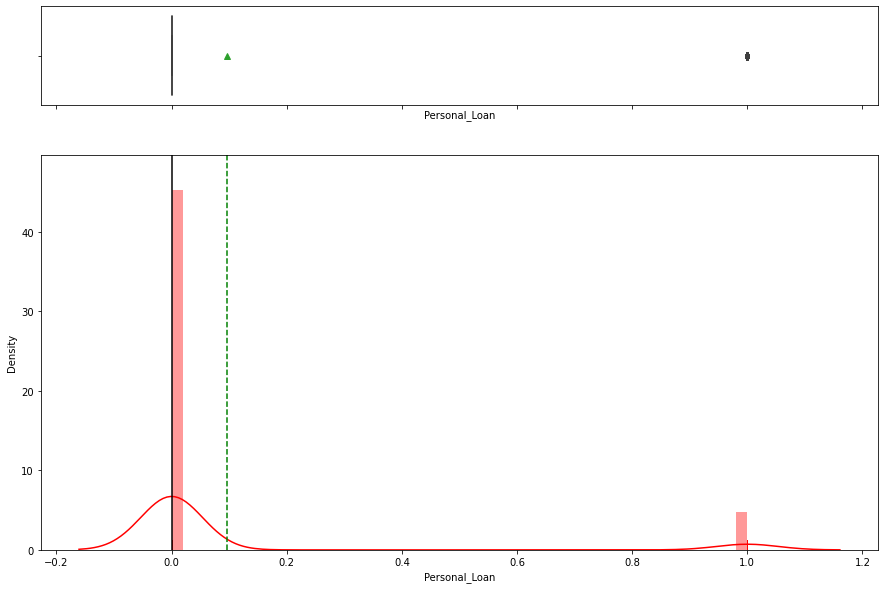

In [23]:
hist_box(df.Personal_Loan)

- Majority of the folks did not take personal loan. 
- Maximum scope is available to make customer accept the loan.

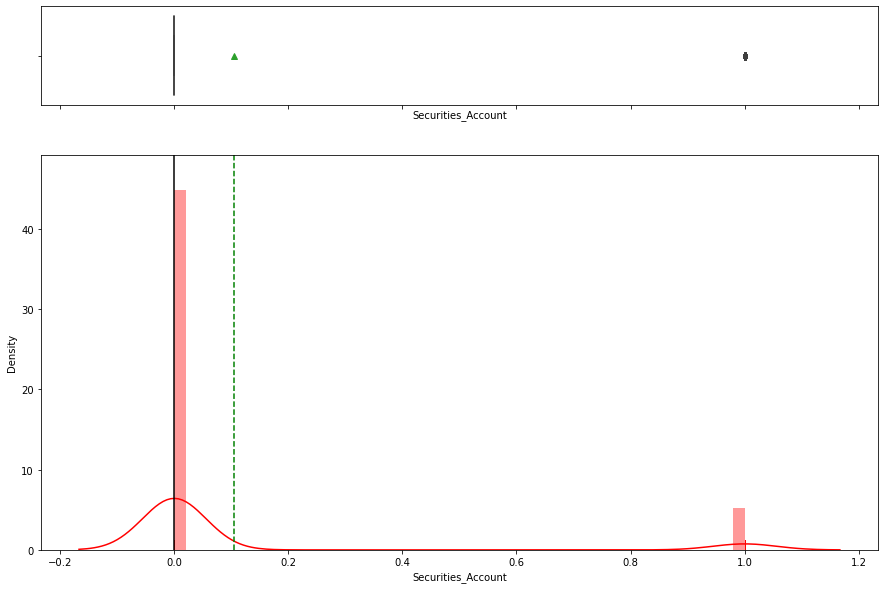

In [24]:
hist_box(df.Securities_Account)

- Majority of the customers does not have Securities_Account

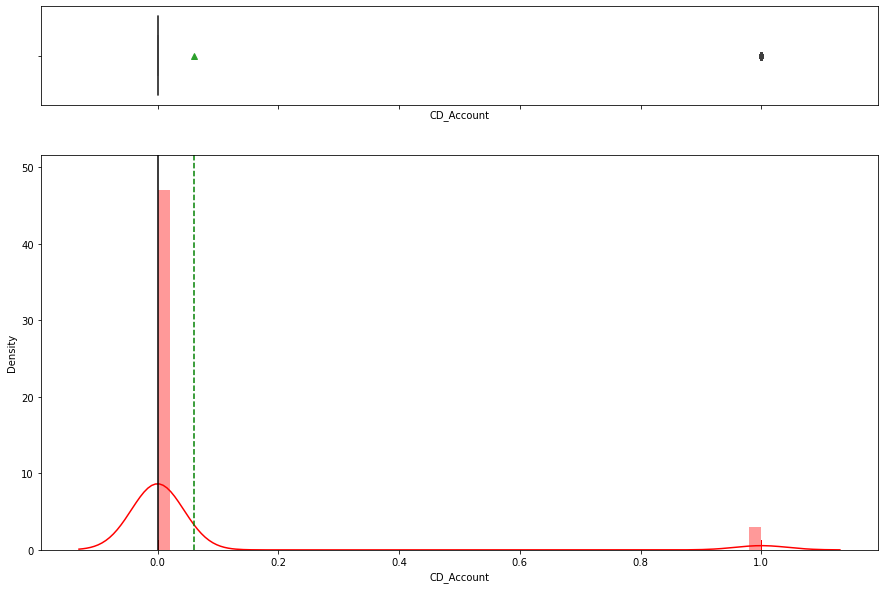

In [25]:
hist_box(df.CD_Account)

- Majority of the customers does not have certificate of deposit

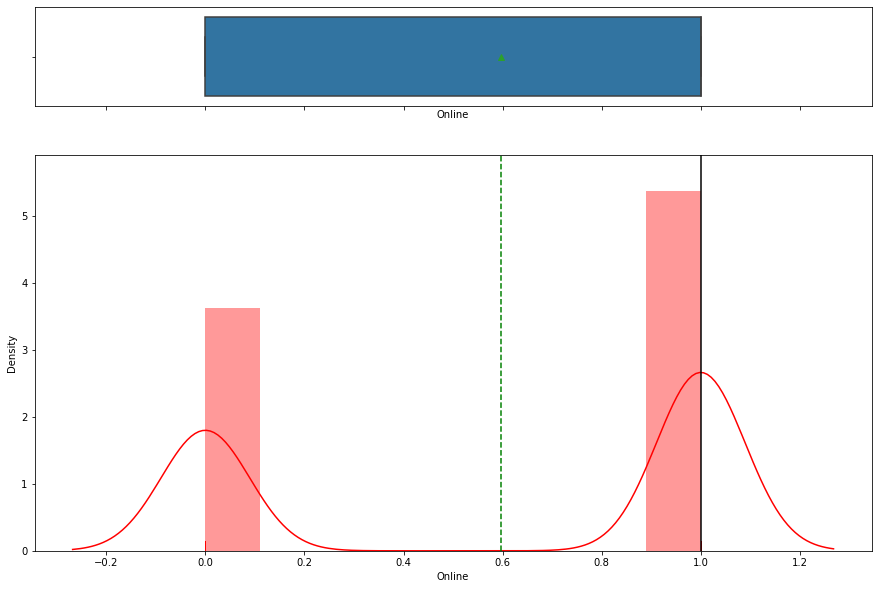

In [26]:
hist_box(df.Online)

- Majority of the customers do have internet banking

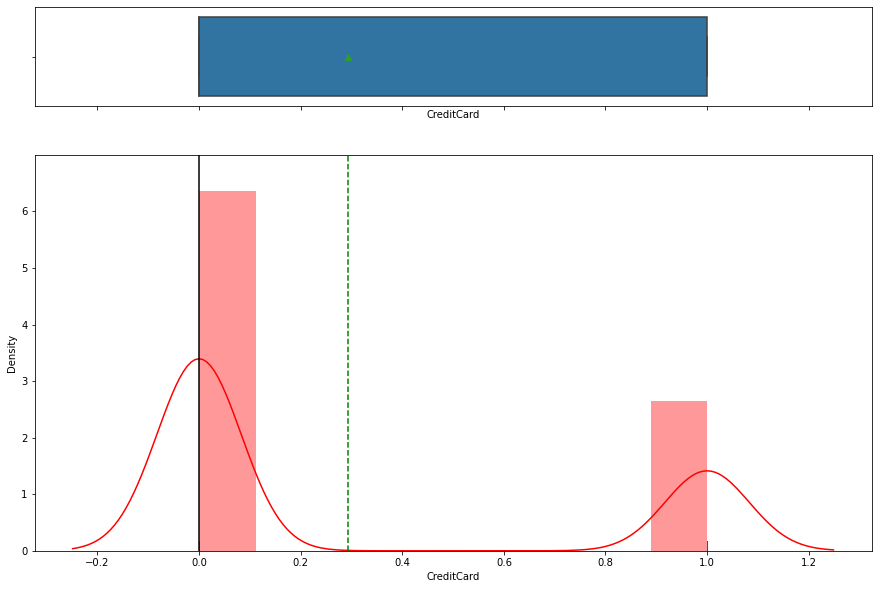

In [27]:
hist_box(df.CreditCard)

- Majority of the people do use credit card issued by any other Bank

In [28]:
# Function to return the percentage of categorical variable
def bar_perc(plot, feature):
    
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),size = 15)

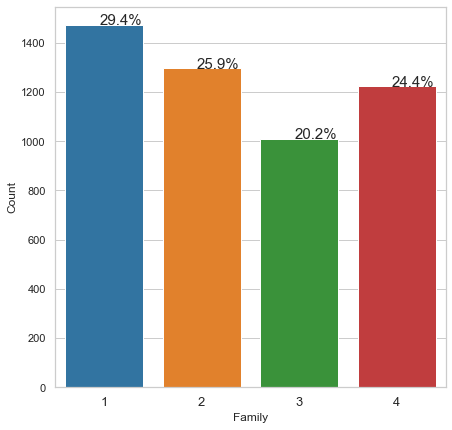

In [29]:
# Location count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['Family'])
plt.xlabel('Family')
plt.ylabel('Count')
bar_perc(ax,df['Family'])
plt.xticks(fontsize =13)
plt.show()

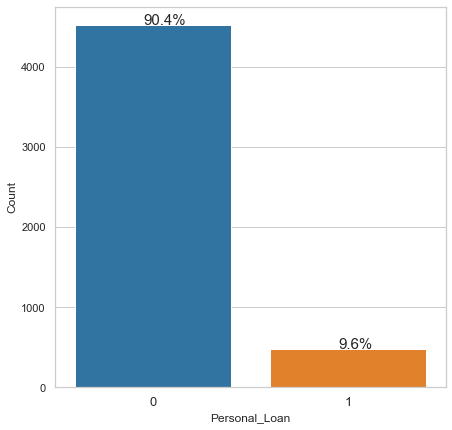

In [30]:
# Personal Loan count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['Personal_Loan'])
plt.xlabel('Personal_Loan')
plt.ylabel('Count')
bar_perc(ax,df['Personal_Loan'])
plt.xticks(fontsize =13)
plt.show()

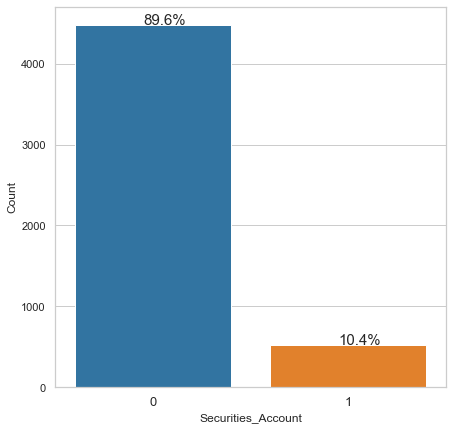

In [31]:
# Personal Loan count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['Securities_Account'])
plt.xlabel('Securities_Account')
plt.ylabel('Count')
bar_perc(ax,df['Securities_Account'])
plt.xticks(fontsize =13)
plt.show()

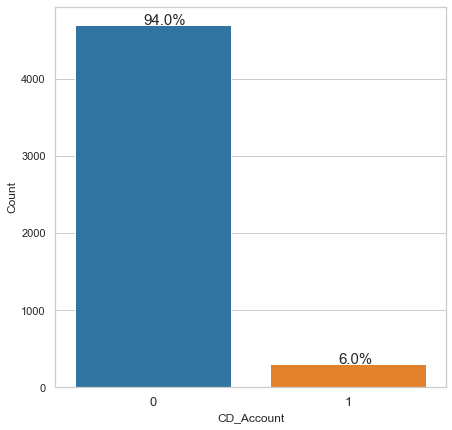

In [32]:
# Personal Loan count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['CD_Account'])
plt.xlabel('CD_Account')
plt.ylabel('Count')
bar_perc(ax,df['CD_Account'])
plt.xticks(fontsize =13)
plt.show()

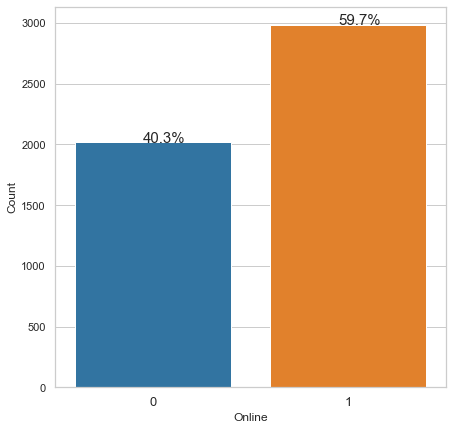

In [33]:
# Personal Loan count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['Online'])
plt.xlabel('Online')
plt.ylabel('Count')
bar_perc(ax,df['Online'])
plt.xticks(fontsize =13)
plt.show()

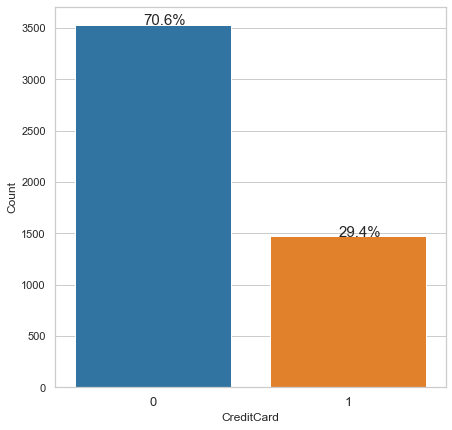

In [34]:
# Personal Loan count analysis 
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.fontsize =(35)
ax = sns.countplot(df['CreditCard'])
plt.xlabel('CreditCard')
plt.ylabel('Count')
bar_perc(ax,df['CreditCard'])
plt.xticks(fontsize =13)
plt.show()

- 70% of the people do use credit card issues by other bank and only 29.4% use the credit card of All Life Bank
- Internet banking is used by 60% of the people and 40% does not use internet banking
- 94% of the people does not have certificate of deposit and 6% only has CD.
- Almost 90% does not have securities account and only 10% has.
- Lot of scope on Personal Loan section as well , 90% did not take personal loan.

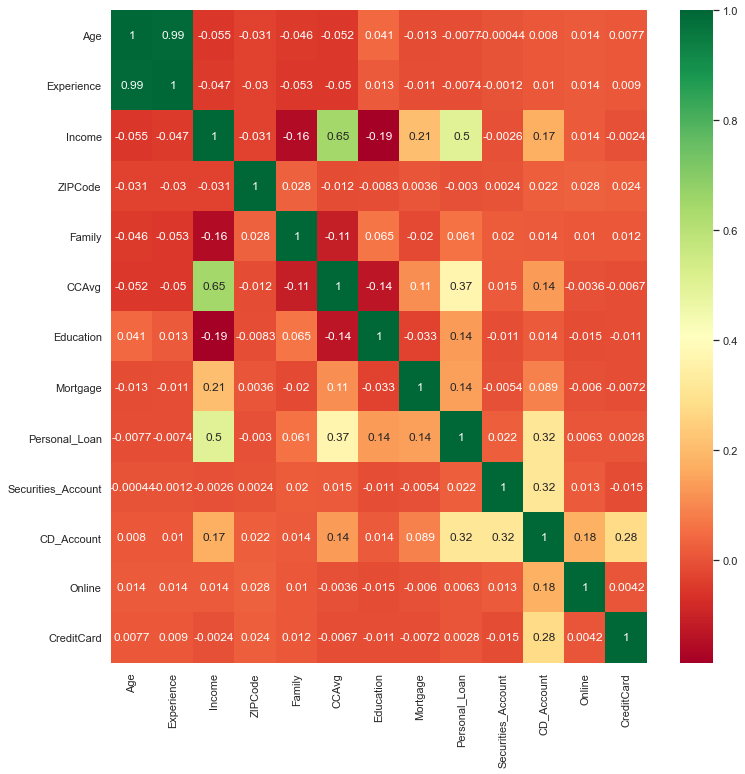

In [35]:
plt.figure(figsize=(12,12))
corrmat = df.corr()
top_corr_features = corrmat.index
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn');

- Experience and Age are highly corrrelated with value of 0.99
- Income and credit card average spending per month are next highly correlated.

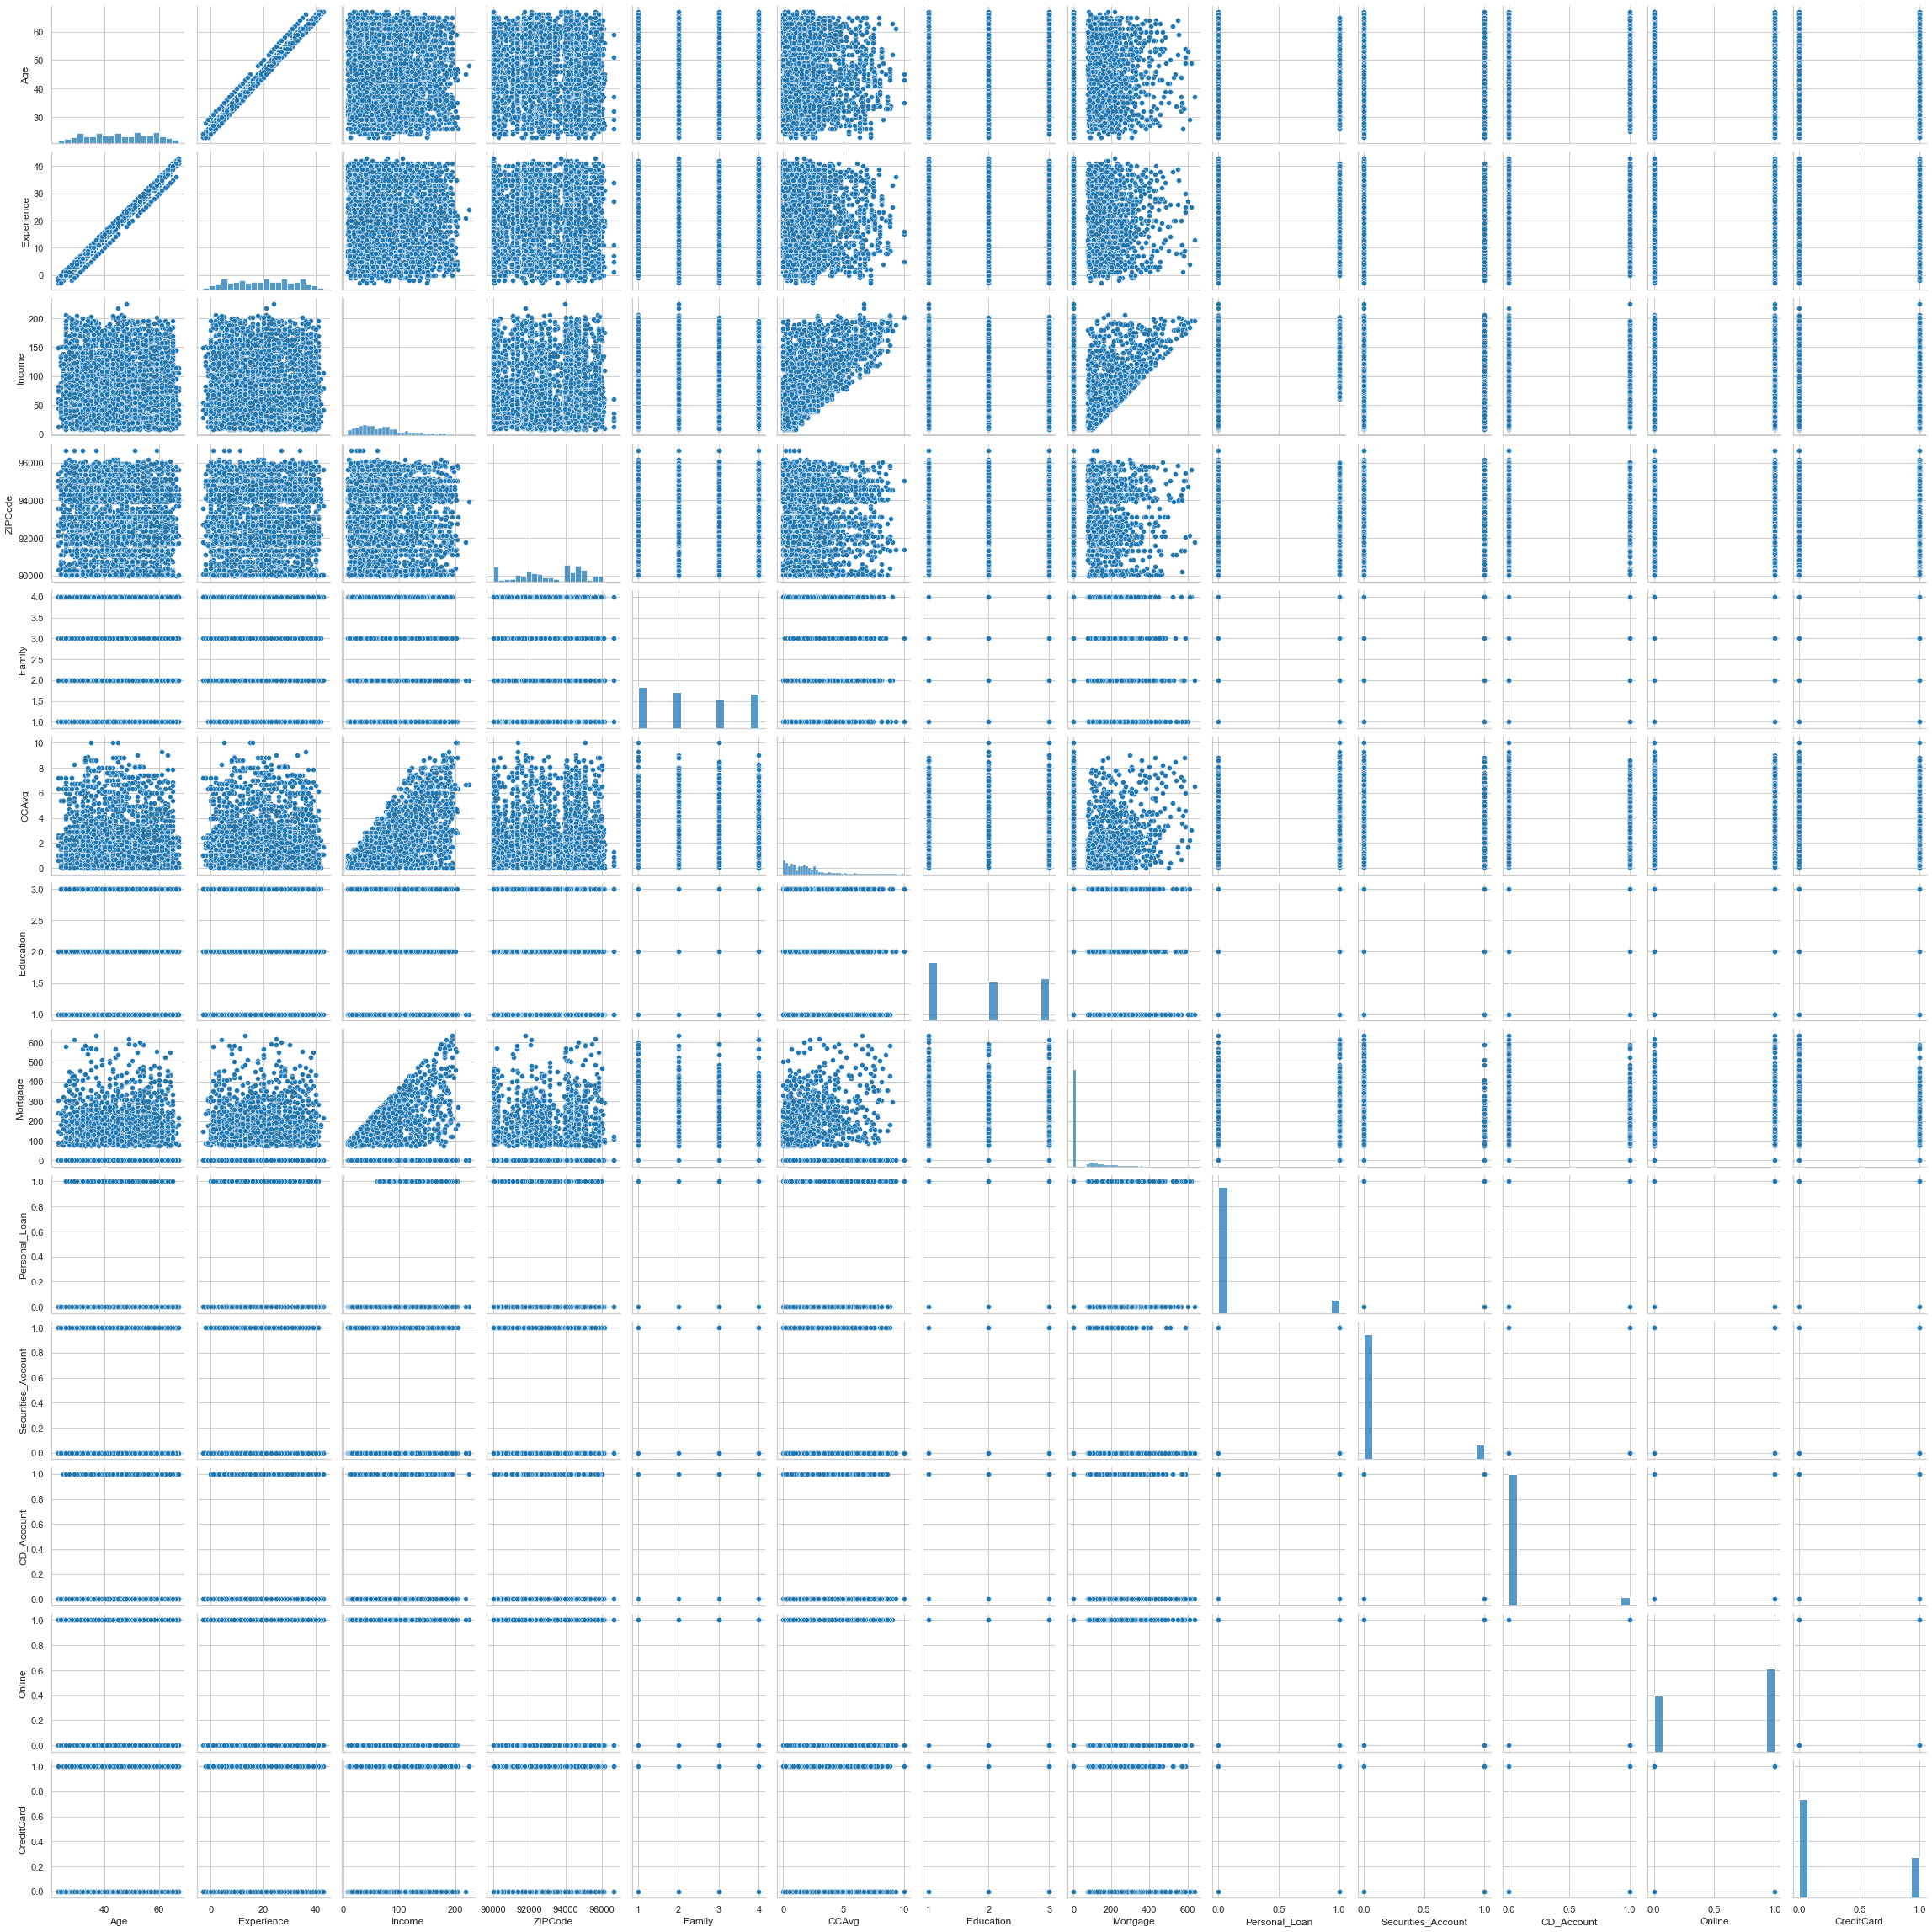

In [36]:
sns.pairplot(df)

<AxesSubplot:xlabel='Mortgage', ylabel='Income'>

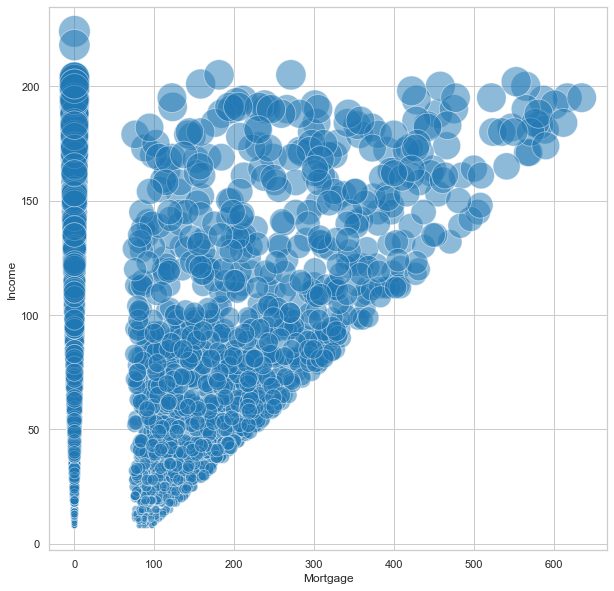

In [37]:
# Scattered plot for Income and Mortgage
plt.figure(figsize=(10,10))
i_normal = (df.Income / df.Income.max()) * 1000 # Normalize the data
mortgage=df.Mortgage
income=df.Income
sns.scatterplot(x=mortgage, y=income,s=i_normal,alpha=0.5)

- As income increases , Mortgage also increased.

<AxesSubplot:xlabel='Mortgage', ylabel='Age'>

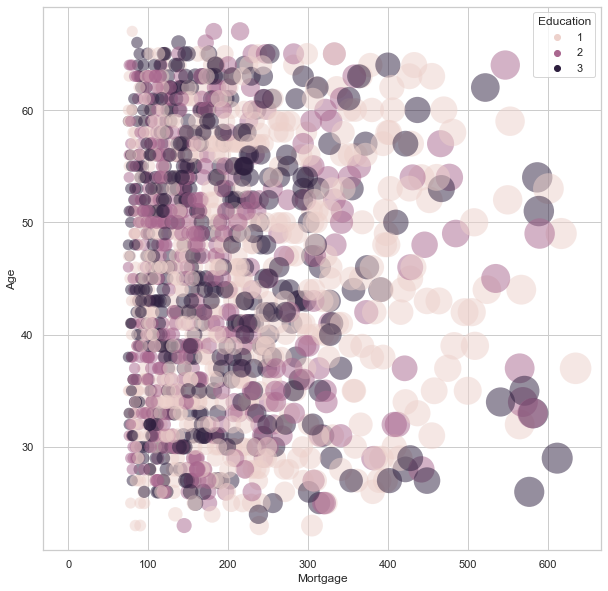

In [38]:
# Scattered plot for Income and Age.
plt.figure(figsize=(10,10))
i_normal = (df.Mortgage / df.Mortgage.max()) * 1000 # Normalize the data
mortgage=df.Mortgage
age=df.Age
sns.scatterplot(x=mortgage, y=age,s=i_normal,alpha=0.5,sizes=(20, 200),hue=df.Education)

- Loan distributed across all the ages.

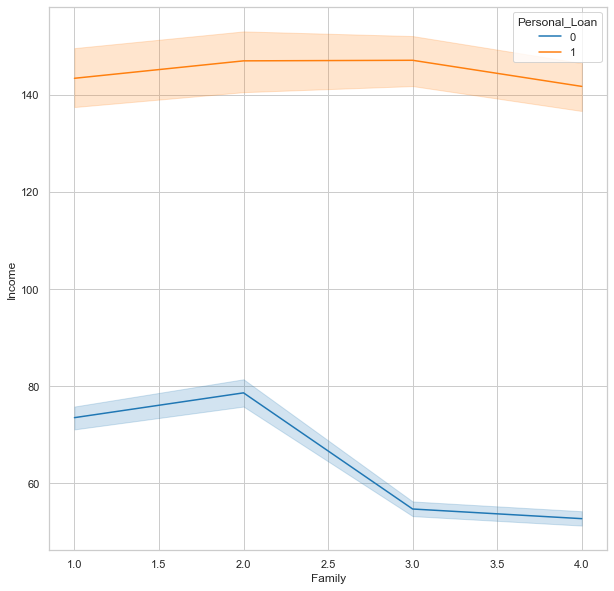

In [39]:
# Family vs Income
plt.figure(figsize=(10,10))
sns.lineplot(x= 'Family', y = 'Income',data=df, hue='Personal_Loan');

- people with income more than 140K took personal loan

<Figure size 720x720 with 0 Axes>

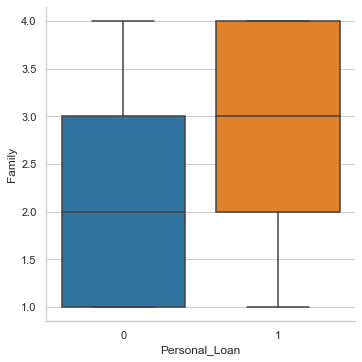

In [40]:
# Family vs Income
plt.figure(figsize=(10,10))
sns.catplot(y=df.Family,x=df.Personal_Loan,data=df,kind="box");

- Family with 1 and 2 people did not take any personal loan , So they are potential customers

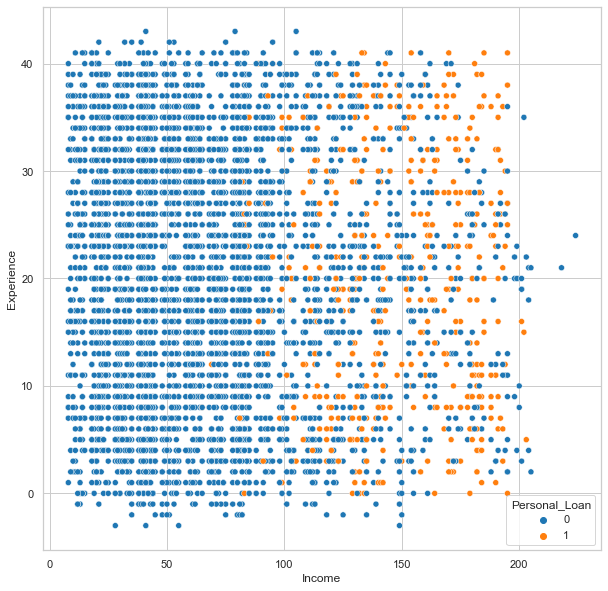

In [41]:
# Experience vs Personal_Loan
plt.figure(figsize=(10,10))
sns.scatterplot(y=df.Experience,x=df.Income,data=df, hue = df.Personal_Loan);

- Majority of the people with income less than 100K did not take personal loan , So they are potential customers as well.

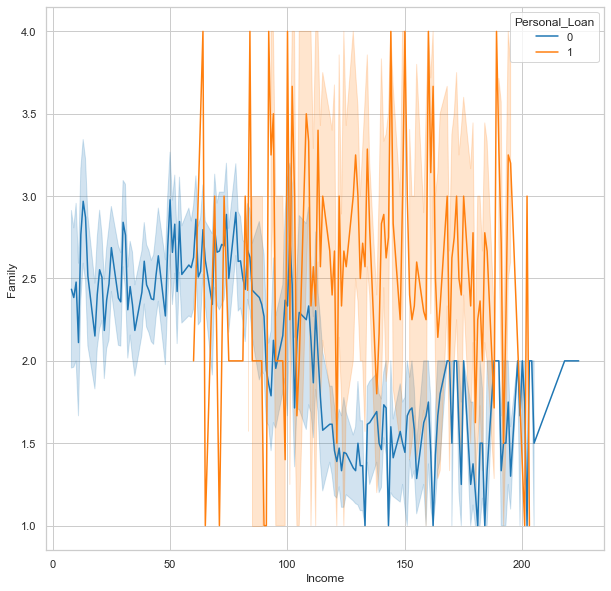

In [42]:
# Experience vs Personal_Loan
plt.figure(figsize=(10,10))
sns.lineplot(y=df.Family,x=df.Income,data=df, hue = df.Personal_Loan);

- Family with income less than 50K , did not take any personal loan.

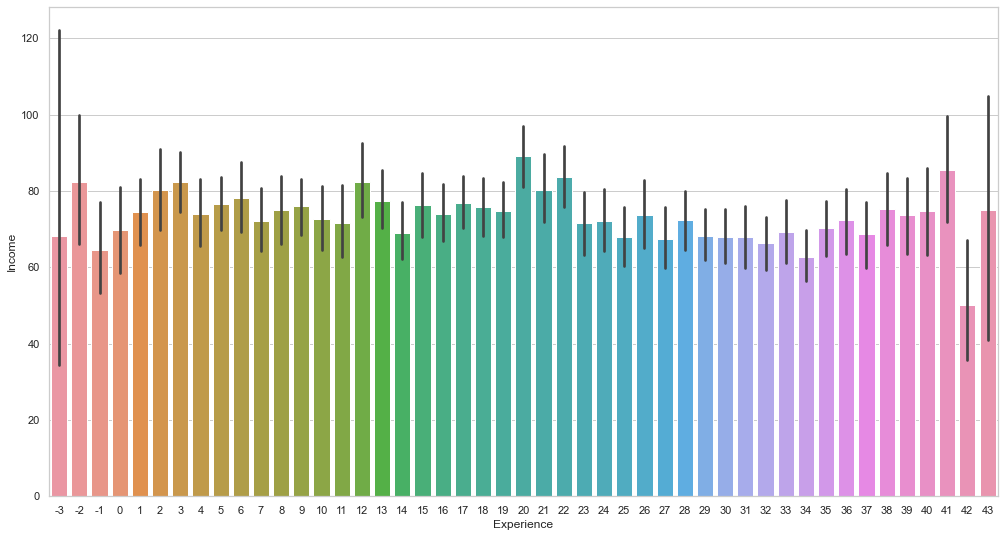

In [43]:
# Box plot for Income and Experience

plt.figure(figsize=(17,9))
sns.barplot(y="Income",x="Experience",data=df)
plt.show()

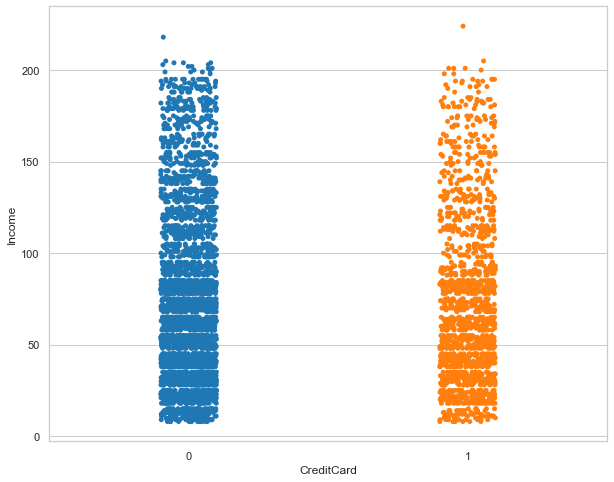

In [44]:
plt.figure(figsize=(10,8))
sns.stripplot(x=df.CreditCard,y=df.Income,jitter=True);

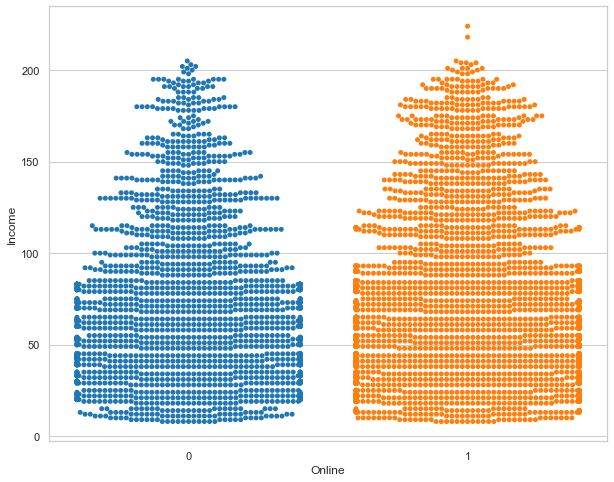

In [45]:
plt.figure(figsize=(10,8))
sns.swarmplot(x=df.Online,y=df.Income);

<Figure size 720x576 with 0 Axes>

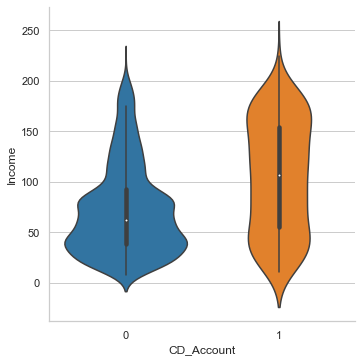

In [46]:
plt.figure(figsize=(10,8))
sns.catplot(x=df.CD_Account,y=df.Income,data=df,kind="violin");

<Figure size 720x720 with 0 Axes>

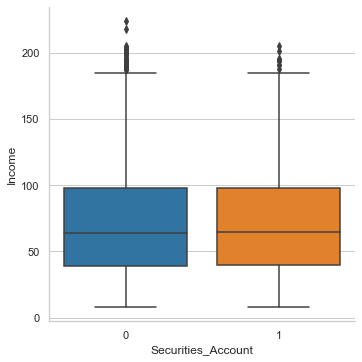

In [47]:
plt.figure(figsize=(10,10));
sns.catplot(x=df.Securities_Account,y=df.Income,data=df,kind="box");

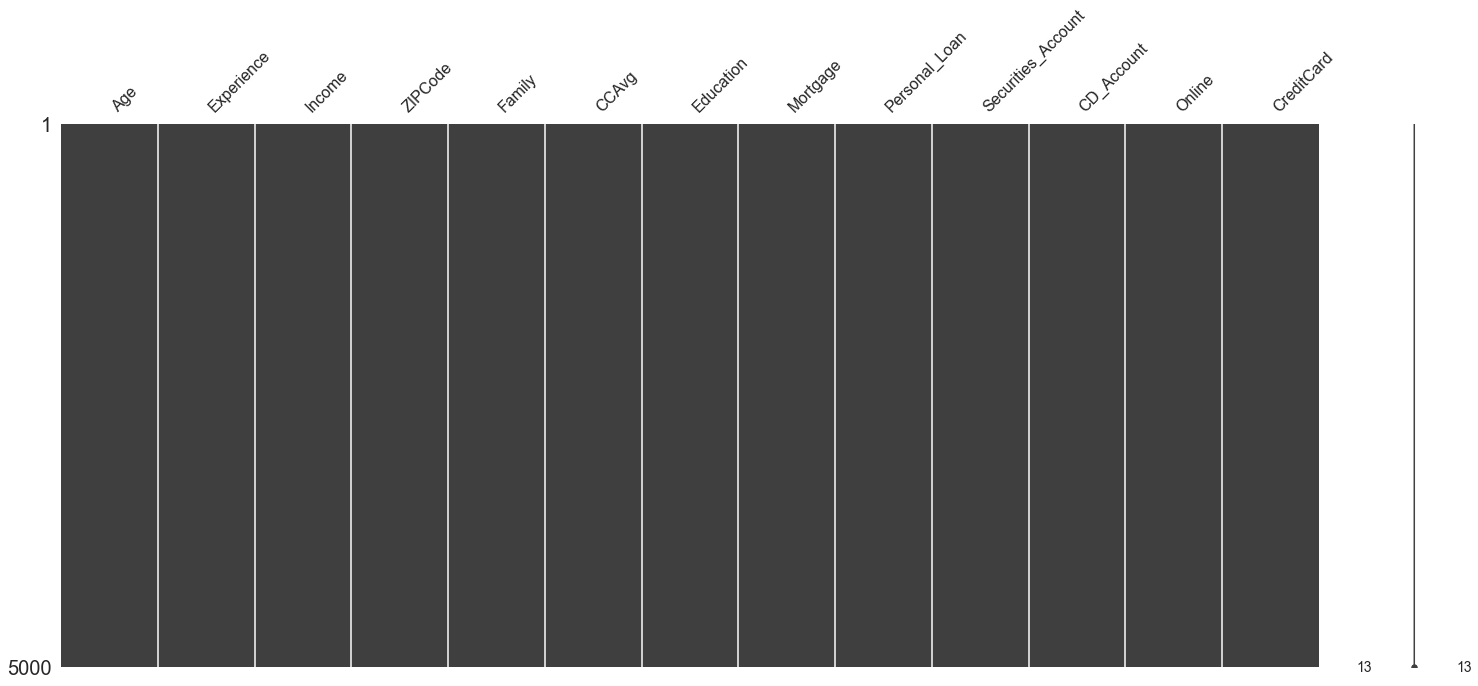

In [48]:
msno.matrix(df);

MSNO matrix gives us the information on the missingness of the data. Looking at the graph above, we can conclude that we do not have missing values at all

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering.The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together.

# Data Preprocessing

- Majority of the family size is 1 , after that 2 and 4. We do not have any missing values in the dataset provided.
- Data was distributed across various ZIP Code. 

In [49]:
search = SearchEngine(simple_zipcode=True)
for i in df.ZIPCode:
    zipcode = search.by_zipcode(i)
    df['State']  = zipcode.state
    df['County'] = zipcode.county

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  State               5000 non-null   object 
 14  County              5000 non-null   object 
dtypes: float64(1), int64(12), object(2)
memory usage: 754.0

In [51]:
cat_columns = df.describe(include=['object']).columns
cat_columns

Index(['State', 'County'], dtype='object')

In [52]:
for i in cat_columns:
    print('Unique values in' , i, 'are :')
    print(df[i].value_counts())
    print('*'*50)

Unique values in State are :
CA    5000
Name: State, dtype: int64
**************************************************
Unique values in County are :
Orange County    5000
Name: County, dtype: int64
**************************************************


- All the 5000 data observations are from state CA , to be very specific they are from Orange County of california.

In [53]:
df.drop(['State','County'],axis=1,inplace=True)

### Outlayer detection using box plot

In [54]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col

['Age',
 'Experience',
 'Income',
 'ZIPCode',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal_Loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

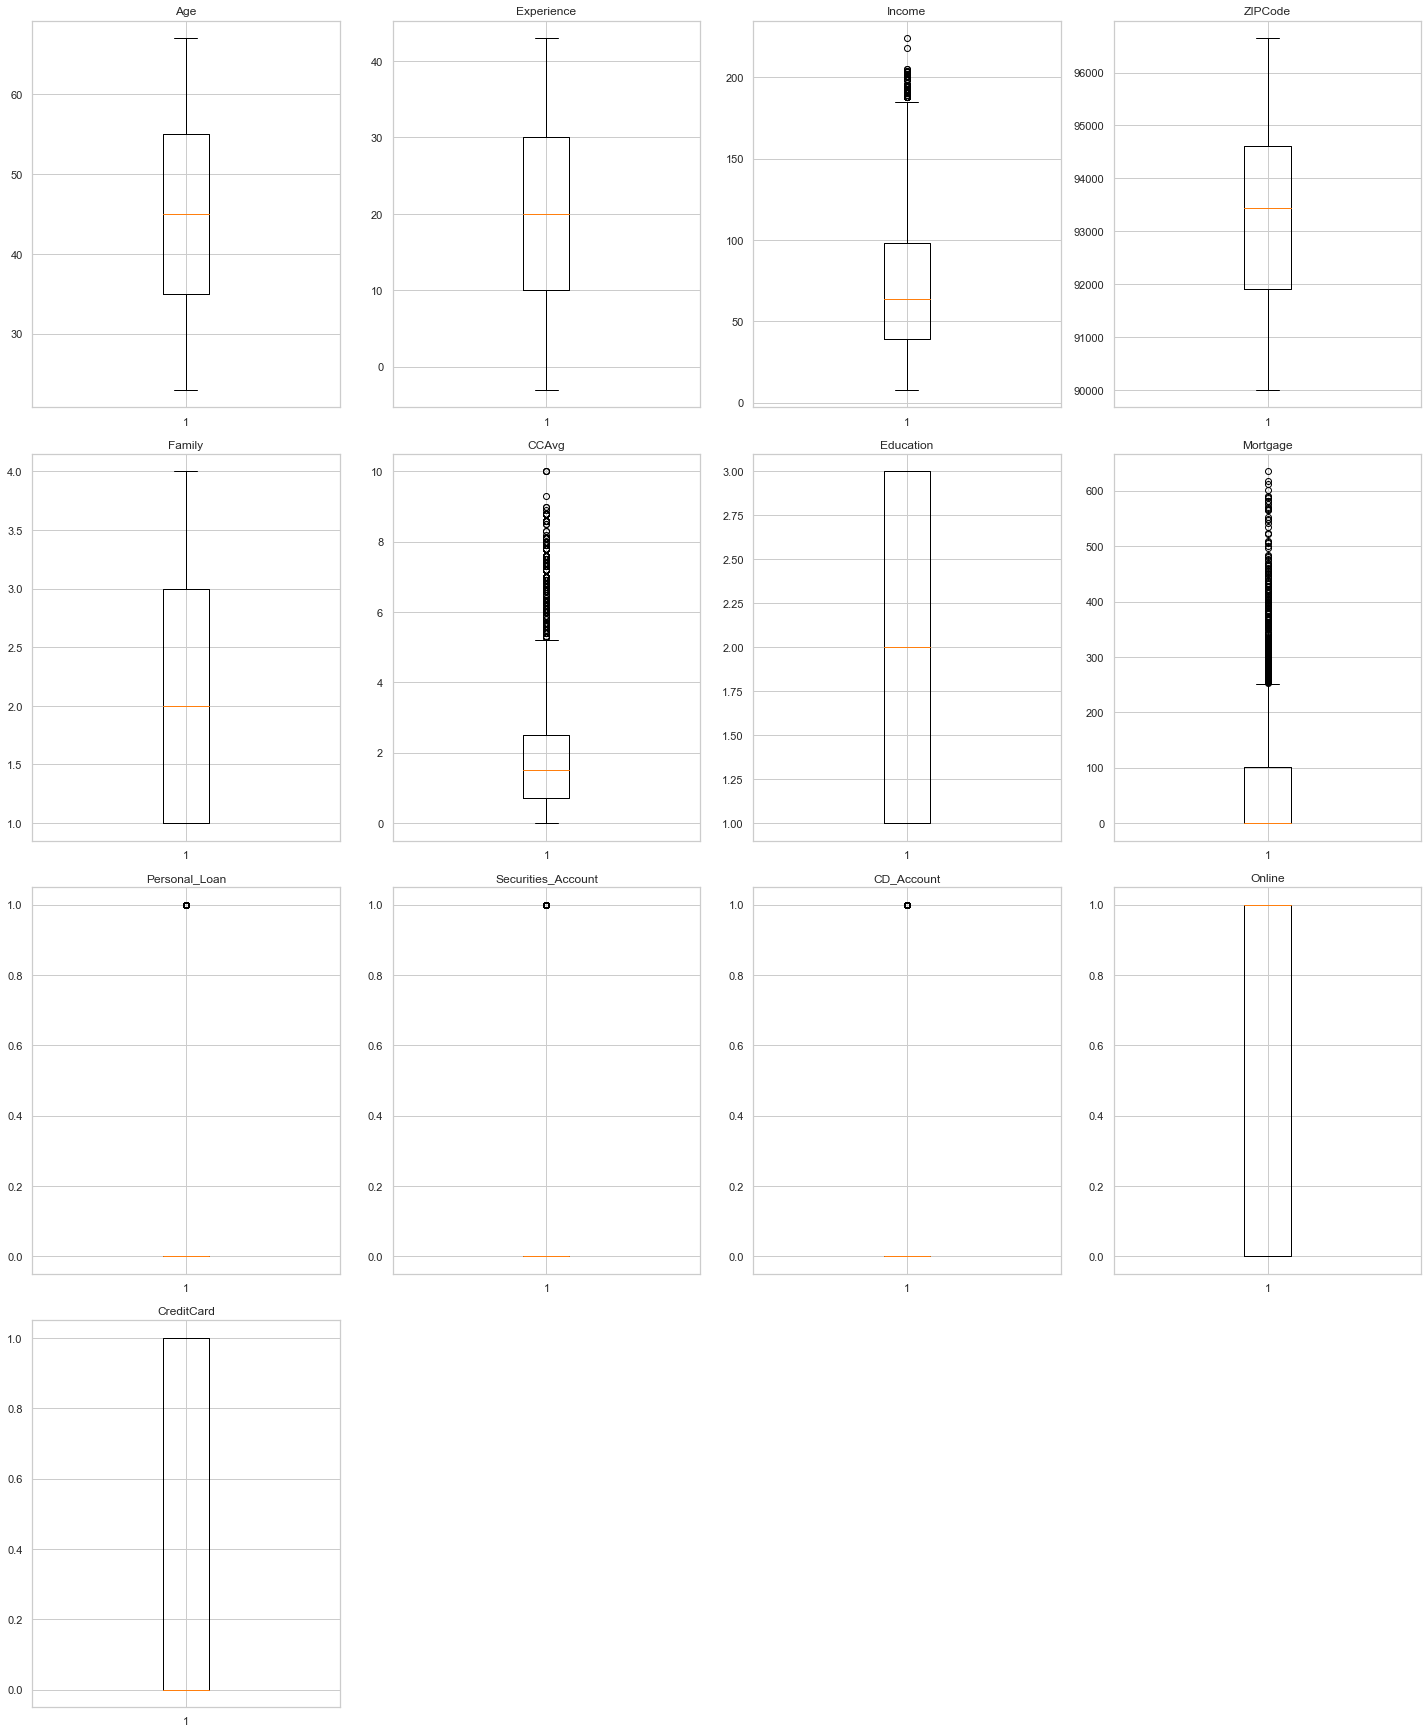

In [55]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(numerical_col):
    plt.subplot(5,4,i+1)
    plt.boxplot(df[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Income , CCAvg , Mortgage do have out layers.
- All these 3 have upper outliers
- May be special processing is required for these data elements.

# Model building - Logistic Regression - sklearn library

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person can take personal loan but actually the person was not interested to take.
2. Predicting a person do not want to take personal loan but actually personal was interested in taking loan.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person can take personal loan but actually the personal was not interested in taking personal loan then it would be waste of time to the bank. 

* If we predict a person doesn't want to take personal loan but actually the person want to take personal loan then bank will lose a potential customer.

### How to reduce losses?
* We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
*  Therefore, `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

In [56]:
def split(*kwargs):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = df.drop([*kwargs], axis=1)
    Y = df['Personal_Loan']

    X = pd.get_dummies(X,drop_first=True)
    X = add_constant(X)

    #Splitting data in train and test sets
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state = 1)
    return x_train,x_test, y_train, y_test

In [57]:
x_train,x_test, y_train, y_test = split('Personal_Loan')

In [58]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

75.00% data is in training set
25.00% data is in test set


In [59]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 1]), (len(df.loc[df['Personal_Loan'] == 1])/len(df.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 0]), (len(df.loc[df['Personal_Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 351 (9.36%)
Training Personal Loan False Values   : 3399 (90.64%)

Test Personal Loan True Values        : 129 (10.32%)
Test Personal Loan False Values       : 1121 (89.68%)



In [60]:
def get_metrics_score_sk(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores
    

In [61]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Yes","Actual - No"]], columns = [i for i in ['Predicted - Yes','Predicted - No']])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
# Fit the model on train
model = LogisticRegression(solver="newton-cg",random_state=1,fit_intercept=False)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
scores_LR = get_metrics_score_sk(model,x_train,x_test,y_train,y_test)

Accuracy on training set :  0.9509333333333333
Accuracy on test set :  0.9456
Recall on training set :  0.6210826210826211
Recall on test set :  0.5968992248062015
Precision on training set :  0.8104089219330854
Precision on test set :  0.8279569892473119
F1 on training set :  0.703225806451613
F1 on test set :  0.6936936936936937


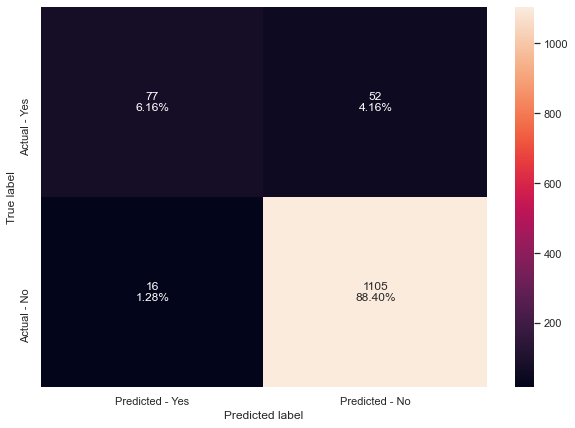

In [63]:
make_confusion_matrix(model,y_test)

In [64]:
report = classification_report(y_test, predicted)
print(report) 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1121
           1       0.83      0.60      0.69       129

    accuracy                           0.95      1250
   macro avg       0.89      0.79      0.83      1250
weighted avg       0.94      0.95      0.94      1250



- We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

# Logistic Regression - Stats Model

In [65]:
def get_metrics_score1(model,train,test,train_y,test_y,threshold=0.7,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [66]:
x_train.head()

const  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
ID                                                                        
3187  1.000   41          16      98    95192       3  1.000          1   
633   1.000   57          32     165    94720       4  2.700          3   
578   1.000   52          28     149    94043       2  6.800          1   
2407  1.000   31           7      10    92354       1  0.500          3   
4687  1.000   61          35     113    91741       2  2.800          1   

      Mortgage  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                  
3187       296                   0           0       0           0  
633          0                   0           0       1           0  
578          0                   0           0       1           0  
2407        81                   0           0       1           0  
4687         0                   0           0       0           0

In [67]:
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg,x_train,x_test,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.124120
         Iterations 9
Accuracy on training set :  0.9514666666666667
Accuracy on test set :  0.9448
Recall on training set :  0.5185185185185185
Recall on test set :  0.49612403100775193
Precision on training set :  0.9333333333333333
Precision on test set :  0.9411764705882353
F1 on training set :  0.6666666666666667
F1 on test set :  0.649746192893401


In [68]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3737
Method:                           MLE   Df Model:                           12
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:                  0.6006
Time:                        16:10:46   Log-Likelihood:                -465.45
converged:                       True   LL-Null:                       -1165.5
Covariance Type:            nonrobust   LLR p-value:                1.382e-292
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.3266      4.926     -2.908      0.004     -23.981      -4.672
Age                   -0.0511      0.072     -0.712      0.477      -0.192       0.090
Experience             0.0574      0.071      0.804      0.421      -0.083       0.197
Income                 0.0549      0.003     17.564      0.000       0.049       0.061
ZIPCode             1.902e-05   4.93e-05      0.385      0.700   -7.77e-05       0.000
Family                 0.7092      0.089      7.993      0.000       0.535       0.883
CCAvg                  0.1511      0.047      3.210      0.001       0.059       0.243
Education              1.8068      0.138     13.051      0.000       1.535       2.078
Mortgage               0.0009      0.001      1.346      0.178      -0.000       0.002
Securities_Account    -1.1426      0.358     -3.190      0.001      -1.844      -0.441
CD_Account             3.6401      0.382      9.530      0.000       2.891       4.389
Online                -0.6286      0.185     -3.404      0.001      -0.991      -0.267
CreditCard            -1.0439      0.236     -4.414      0.000      -1.507      -0.580
======================================================================================
"""

**But first we will have to remove multicollinearity from the data to get reliable coefficients and p-values.** 
* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

# Multicollinearity

In [69]:
# changing datatype of colums to numeric for checking vif
X_train_num = x_train.astype(float).copy()

In [70]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                3263.217
Age                    96.146
Experience             96.087
Income                  1.870
ZIPCode                 1.005
Family                  1.032
CCAvg                   1.734
Education               1.118
Mortgage                1.048
Securities_Account      1.138
CD_Account              1.341
Online                  1.039
CreditCard              1.108
dtype: float64



- We can see Age , Experience and ZIPCode has high VIF value.
- We will re run a model after removing those variables one by one.

In [71]:
X_train_num1 = X_train_num.drop('Age',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train_num1.values,i) for i in range(X_train_num1.shape[1])],index=X_train_num1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                2847.263
Experience              1.010
Income                  1.865
ZIPCode                 1.005
Family                  1.031
CCAvg                   1.728
Education               1.046
Mortgage                1.048
Securities_Account      1.138
CD_Account              1.340
Online                  1.039
CreditCard              1.108
dtype: float64



- Removal of Age has fixed multicollinearity.
- We will re run the process after removing ZIPCode as well.

In [72]:
x_train.head()

const  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
ID                                                                        
3187  1.000   41          16      98    95192       3  1.000          1   
633   1.000   57          32     165    94720       4  2.700          3   
578   1.000   52          28     149    94043       2  6.800          1   
2407  1.000   31           7      10    92354       1  0.500          3   
4687  1.000   61          35     113    91741       2  2.800          1   

      Mortgage  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                  
3187       296                   0           0       0           0  
633          0                   0           0       1           0  
578          0                   0           0       1           0  
2407        81                   0           0       1           0  
4687         0                   0           0       0           0

In [73]:
x_train_1,x_test_1, y_train, y_test = split('Personal_Loan')

In [74]:
x_train_1.drop(['Age'],axis=1,inplace=True)
x_test_1.drop(['Age'],axis=1,inplace=True)

In [75]:
logit1 = sm.Logit(y_train, x_train_1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg1,x_train_1,x_test_1,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.124189
         Iterations 9
Accuracy on training set :  0.9517333333333333
Accuracy on test set :  0.944
Recall on training set :  0.5213675213675214
Recall on test set :  0.4883720930232558
Precision on training set :  0.9336734693877551
Precision on test set :  0.9402985074626866
F1 on training set :  0.6691042047531993
F1 on test set :  0.6428571428571428


- After removing the Age there is no big change to Accuracy 
- Recall of the model was decreased by 1%

In [76]:
X_train_num2 = X_train_num.drop('ZIPCode',axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train_num2.values,i) for i in range(X_train_num2.shape[1])],index=X_train_num2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                462.510
Age                   96.134
Experience            96.067
Income                 1.866
Family                 1.032
CCAvg                  1.733
Education              1.118
Mortgage               1.048
Securities_Account     1.138
CD_Account             1.340
Online                 1.039
CreditCard             1.108
dtype: float64



- Age and Experience has high multicollinearity and it is expected. As age increases , experice also increases.

In [77]:
x_train_2,x_test_2, y_train, y_test = split('Personal_Loan')

In [78]:
x_train_2.drop(['ZIPCode'],axis=1,inplace=True)
x_test_2.drop(['ZIPCode'],axis=1,inplace=True)

In [79]:
logit2 = sm.Logit(y_train, x_train_2.astype(float))
lg2 = logit2.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg2,x_train_2,x_test_2,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.124140
         Iterations 9
Accuracy on training set :  0.9514666666666667
Accuracy on test set :  0.9448
Recall on training set :  0.5185185185185185
Recall on test set :  0.49612403100775193
Precision on training set :  0.9333333333333333
Precision on test set :  0.9411764705882353
F1 on training set :  0.6666666666666667
F1 on test set :  0.649746192893401


In [80]:
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3738
Method:                           MLE   Df Model:                           11
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:                  0.6006
Time:                        16:10:46   Log-Likelihood:                -465.53
converged:                       True   LL-Null:                       -1165.5
Covariance Type:            nonrobust   LLR p-value:                1.289e-293
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.5824      1.934     -6.504      0.000     -16.374      -8.791
Age                   -0.0500      0.072     -0.698      0.485      -0.190       0.090
Experience             0.0562      0.071      0.789      0.430      -0.083       0.196
Income                 0.0548      0.003     17.559      0.000       0.049       0.061
Family                 0.7100      0.089      8.003      0.000       0.536       0.884
CCAvg                  0.1519      0.047      3.231      0.001       0.060       0.244
Education              1.8067      0.138     13.050      0.000       1.535       2.078
Mortgage               0.0009      0.001      1.336      0.182      -0.000       0.002
Securities_Account    -1.1442      0.358     -3.195      0.001      -1.846      -0.442
CD_Account             3.6471      0.382      9.556      0.000       2.899       4.395
Online                -0.6308      0.185     -3.418      0.001      -0.993      -0.269
CreditCard            -1.0441      0.236     -4.417      0.000      -1.507      -0.581
======================================================================================
"""

- After removing ZIPCode , once again the model performance retained the same but Recall value got decreased.

**Observations:**
1. Dropping Age or ZIPCode doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.
3. Here, we will go with the lg1 model - where we dropped Age
4. Some of the categorical levels of a variable still have VIF>5 but removing certain categories from a variable will impact the interpretations from the model.

# ROC - AUC

- ROC-AUC on training set

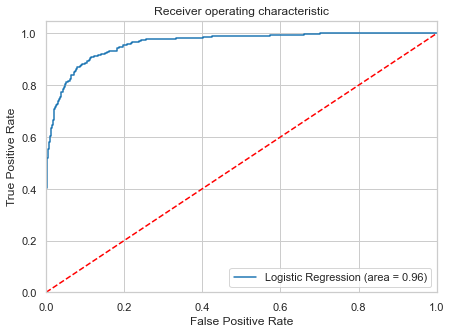

In [81]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(x_train_1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train_1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

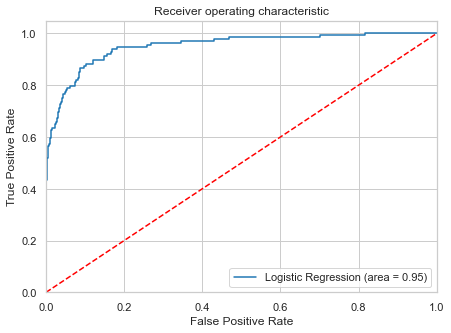

In [82]:
logit_roc_auc_test = roc_auc_score(y_test, lg1.predict(x_test_1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(x_test_1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- Logistic Regression model has given generalized performance on training and test set.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**


* Odds from coefficients

In [83]:
odds = np.exp(lg1.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, x_train_1.columns, columns=['odds']).T # adding the odds to a dataframe

const  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
odds  0.000       1.007   1.057    1.000   2.033  1.163      5.996     1.001   

      Securities_Account  CD_Account  Online  CreditCard  
odds               0.320      38.310   0.535       0.353

In [84]:
perc_change_odds = (np.exp(lg1.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, x_train_1.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

const  Experience  Income  ZIPCode  Family  CCAvg  Education  \
change_odds% -100.000       0.691   5.652    0.002 103.298 16.284    499.566   

              Mortgage  Securities_Account  CD_Account  Online  CreditCard  
change_odds%     0.087             -68.040    3731.011 -46.519     -64.680

- When compare to Model 1(lg1) and (lg2) , the coefficients of lg1 are good. 
- Constant value got decreased by -100 points.
- Holding all other features constant a 1 unit change in Experience will decrease the odds of a person purchasing personal loan by 0.69 percent.
- CD Account has highest coefficient value.

`Interpretation for other attributes can be done similarly.`

## Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [85]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg1.predict(x_test_1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.12412728763142652


In [86]:
scores_LR = get_metrics_score1(lg1,x_train_1,x_test_1,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.9114666666666666
Accuracy on test set :  0.9088
Recall on training set :  0.8717948717948718
Recall on test set :  0.8604651162790697
Precision on training set :  0.5160202360876898
Precision on test set :  0.5362318840579711
F1 on training set :  0.6483050847457628
F1 on test set :  0.6607142857142858
ROC-AUC Score on training set :  0.893679136397583
ROC-AUC Score on test set :  0.8874136464535402


- Using the optimal thersold value , Recall value was improved to 86%
- Accuracy also got decreased , that means to say this model is very optimal for majority of the cases.

#### Let's use Precision-Recall curve and see if we can find a better threshold

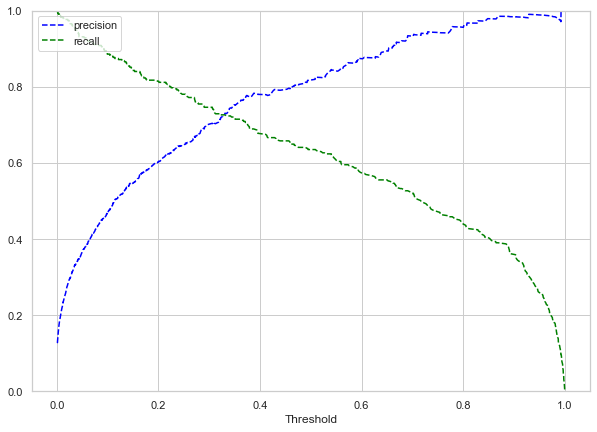

In [87]:
y_scores=lg1.predict(x_train_1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.36, we get balanced recall and precision.

In [88]:
optimal_threshold_curve = 0.36
scores_LR = get_metrics_score1(lg1,x_train_1,x_test_1,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.9114666666666666
Accuracy on test set :  0.9088
Recall on training set :  0.8717948717948718
Recall on test set :  0.8604651162790697
Precision on training set :  0.5160202360876898
Precision on test set :  0.5362318840579711
F1 on training set :  0.6483050847457628
F1 on test set :  0.6607142857142858
ROC-AUC Score on training set :  0.893679136397583
ROC-AUC Score on test set :  0.8874136464535402


* There's not much change in the model performance as the default threshold is 0.5 and we selected 0.36 as the optimal threshold.

### Model Performance Summary

In [89]:
# defining list of model
models = [lg1]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,x_train_1,x_test_1,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [90]:
# defining list of model
models = [lg1]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,x_train_1,x_test_1,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [91]:
# defining list of model
models = [lg1]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,x_train_1,x_test_1,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [92]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0 .12',
                                          'Logistic Regression - Optimal threshold = 0 .36'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    

comparison_frame

Model  Train_Accuracy  \
0          Logistic Regression Model - Statsmodels           0.952   
1  Logistic Regression - Optimal threshold = 0 .12           0.911   
2  Logistic Regression - Optimal threshold = 0 .36           0.953   

   Test_Accuracy  Train Recall  Test Recall  Train Precision  Test Precision  \
0          0.944         0.521        0.488            0.934           0.940   
1          0.909         0.872        0.860            0.516           0.536   
2          0.941         0.715        0.682            0.763           0.727   

   Train F1  Test F1  
0     0.669    0.643  
1     0.648    0.661  
2     0.738    0.704

### Conclusion
- We have been able to build a predictive model that can be used by the bank to find customer who are willing to take personal loan with recall value of 0.86 the test set (Statsmodels -  Logistic Regression - with significant predictors).
- Coefficient of majority of the variables are positive an increase in these will lead to increase in purchse of loan.

# Decision Tree Model

In [93]:
x_tree = df.drop(['Personal_Loan'], axis=1)
y_tree = df['Personal_Loan']

# Splitting data into training and test set:
X_train, X_test, Y_train, Y_test =train_test_split(x_tree, y_tree, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape)

(3750, 12) (1250, 12)


## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [94]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [95]:
## Function to create confusion matrix
def make_confusion_matrix_tree(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Yes","Actual - No"]], columns = [i for i in ['Predicted - Yes','Predicted - No']])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

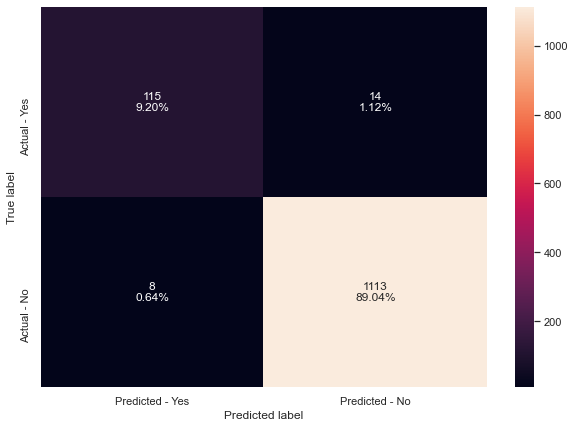

In [96]:
make_confusion_matrix_tree(model,Y_test)

In [97]:
y_train.value_counts(1)

0   0.906
1   0.094
Name: Personal_Loan, dtype: float64

We only have 9% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

In [98]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))

In [99]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8914728682170543


* There is a no huge disparity in performance of model on training set and test set

## Insights:

- **True Positives:**
    - Reality: A customer want to take personal loan.
    - Model predicted: The customer will buy personal loan
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT take personal loan
    - Model predicted: The customer will NOT buy personal loan
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT buy personal loan
    - Model predicted: The customer will buy personal loan
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be buying a personal loan

- **False Negatives:**
    - Reality: A customer took personal loan
    - Model predicted: The customer will NOT buy personal loan
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer come again to purchase. (Customer retention will get affected.)

In [100]:
column_names = list(df.columns)
column_names.remove('Personal_Loan')    # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


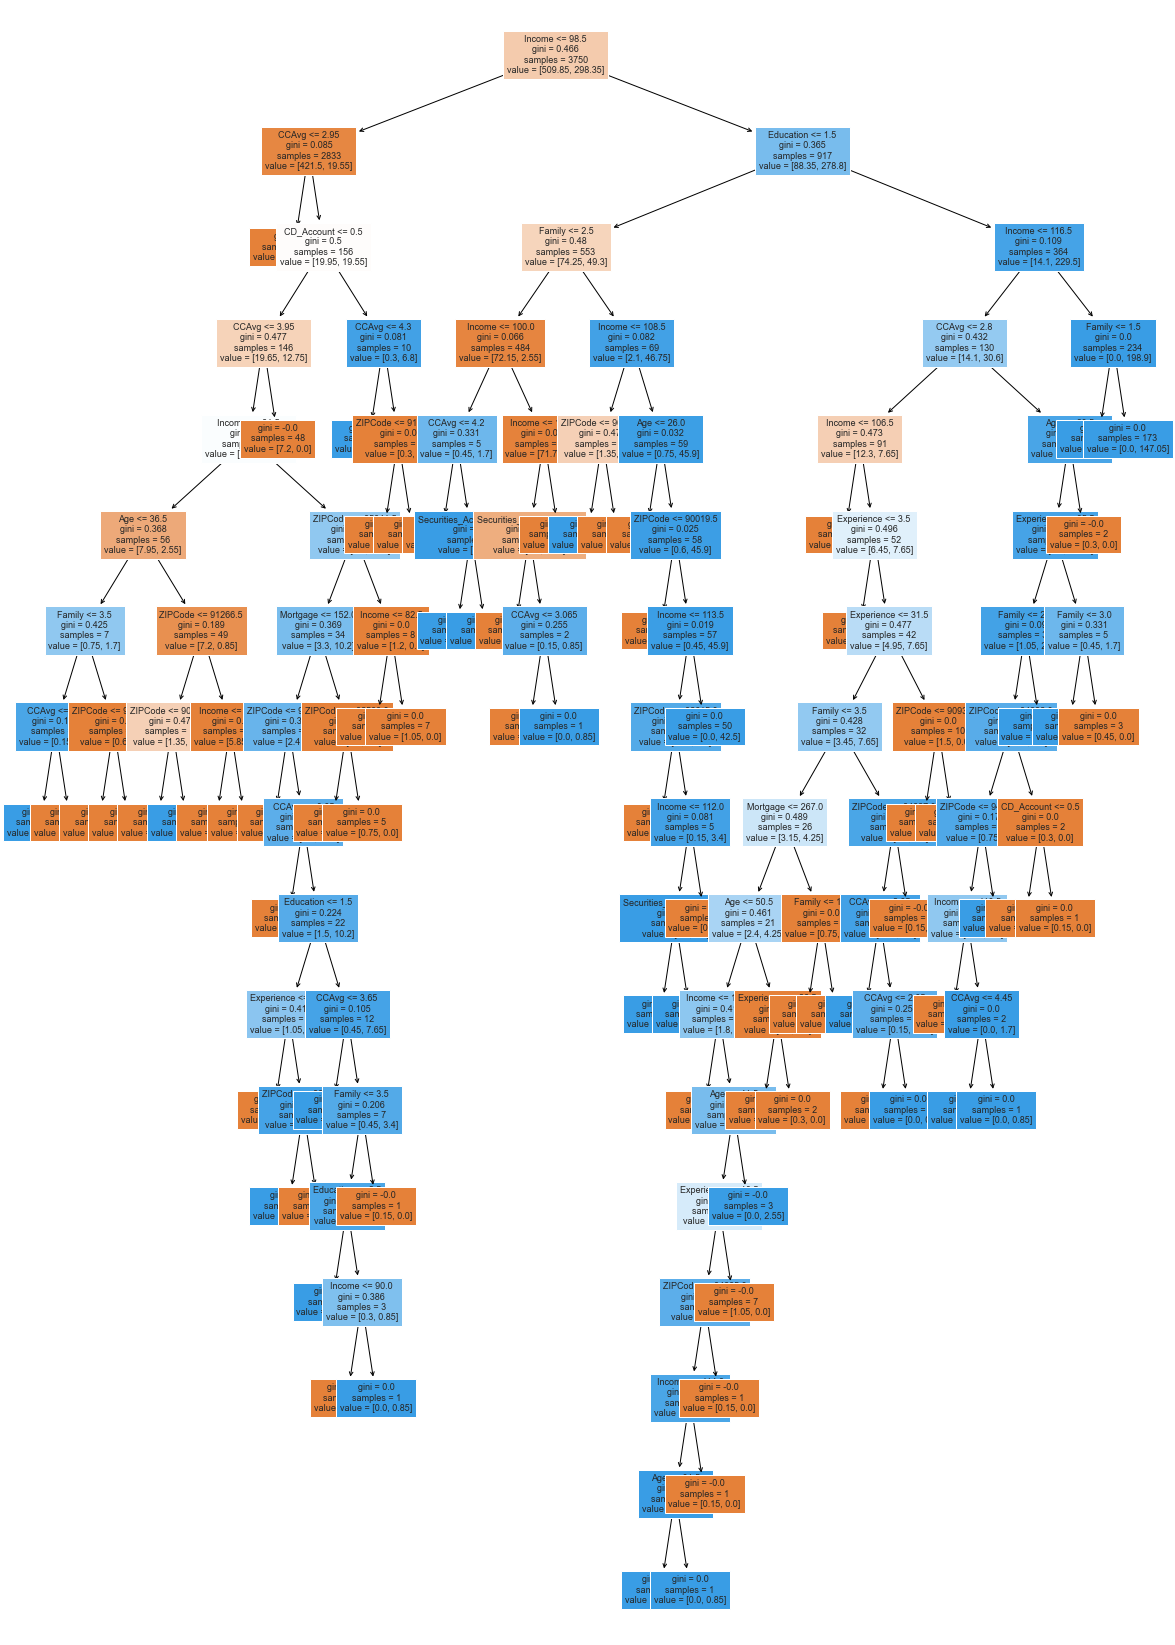

In [101]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [102]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [401.55, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- ZIPCode <= 92308.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |   |--- ZIPCode >  92308.50
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode <= 91266.50
|   |   |   |   |   |   |   |--- ZIPCode <= 90974.00
|   |   |   |   |   |   |   |   |--- weights: [1.

In [103]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                     Imp
Income             0.595
Family             0.140
Education          0.129
CCAvg              0.079
ZIPCode            0.019
Experience         0.012
CD_Account         0.010
Age                0.008
Mortgage           0.004
Securities_Account 0.003
Online             0.000
CreditCard         0.000


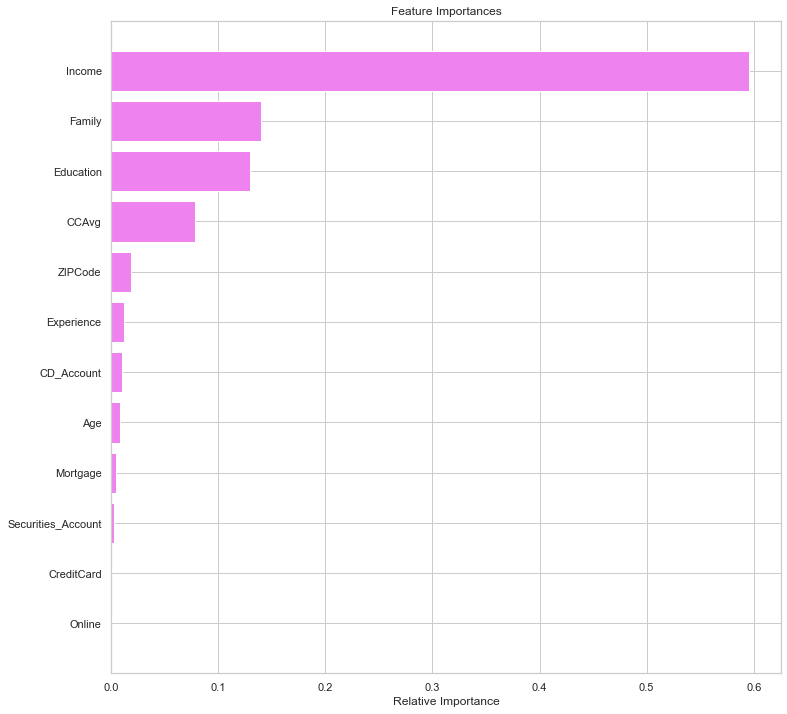

In [104]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Reducing over fitting
### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [105]:
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=4,
                       max_features='log2', min_impurity_decrease=1e-06,
                       random_state=1)

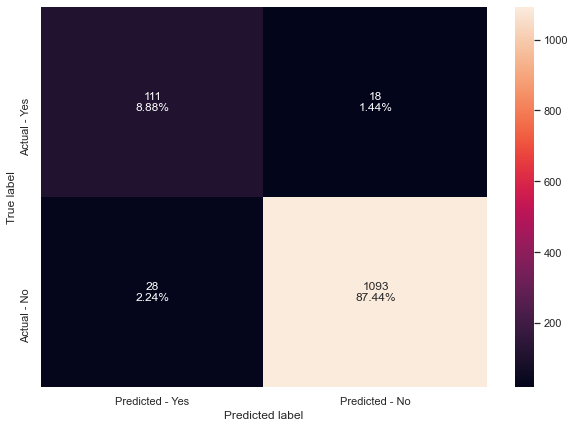

In [106]:
make_confusion_matrix_tree(estimator,y_test)

In [107]:
get_recall_score(estimator)

Recall on training set :  0.9344729344729344
Recall on test set :  0.8604651162790697


**Recall has improved for both train and test set after hyperparameter tuning and we have a generalized model.**

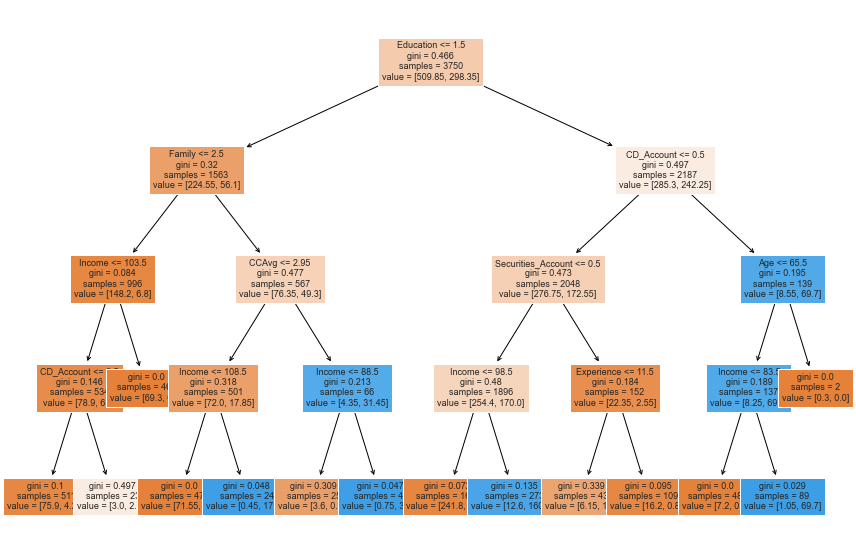

In [108]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [109]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Education <= 1.50
|   |--- Family <= 2.50
|   |   |--- Income <= 103.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [75.90, 4.25] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [3.00, 2.55] class: 0
|   |   |--- Income >  103.50
|   |   |   |--- weights: [69.30, 0.00] class: 0
|   |--- Family >  2.50
|   |   |--- CCAvg <= 2.95
|   |   |   |--- Income <= 108.50
|   |   |   |   |--- weights: [71.55, 0.00] class: 0
|   |   |   |--- Income >  108.50
|   |   |   |   |--- weights: [0.45, 17.85] class: 1
|   |   |--- CCAvg >  2.95
|   |   |   |--- Income <= 88.50
|   |   |   |   |--- weights: [3.60, 0.85] class: 0
|   |   |   |--- Income >  88.50
|   |   |   |   |--- weights: [0.75, 30.60] class: 1
|--- Education >  1.50
|   |--- CD_Account <= 0.50
|   |   |--- Securities_Account <= 0.50
|   |   |   |--- Income <= 98.50
|   |   |   |   |--- weights: [241.80, 9.35] class: 0
|   |   |   |--- Income >  98.50
|   |   |   |   |--- weights: [12

In [110]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                     Imp
Income             0.662
CD_Account         0.114
Education          0.078
CCAvg              0.075
Family             0.054
Securities_Account 0.013
Age                0.002
Experience         0.001
ZIPCode            0.000
Mortgage           0.000
Online             0.000
CreditCard         0.000


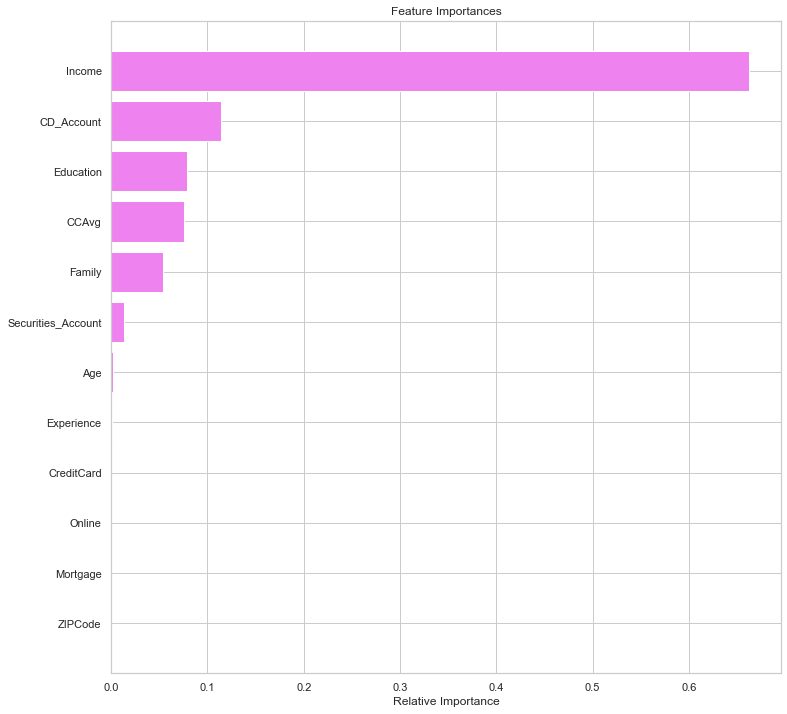

In [111]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [112]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [113]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.000      -0.000
1        0.000      -0.000
2        0.000      -0.000
3        0.000      -0.000
4        0.000      -0.000
5        0.000      -0.000
6        0.000      -0.000
7        0.000      -0.000
8        0.000      -0.000
9        0.000      -0.000
10       0.000      -0.000
11       0.000      -0.000
12       0.000      -0.000
13       0.000      -0.000
14       0.000      -0.000
15       0.000       0.000
16       0.000       0.001
17       0.000       0.002
18       0.000       0.002
19       0.000       0.003
20       0.000       0.003
21       0.000       0.003
22       0.000       0.004
23       0.000       0.005
24       0.001       0.009
25       0.001       0.009
26       0.001       0.010
27       0.001       0.015
28       0.001       0.017
29       0.001       0.018
30       0.001       0.020
31       0.001       0.022
32       0.001       0.022
33       0.001       0.023
34       0.001       0.025
35       0.001       0.026
36       0.001       0.029
37       0.002       0.030
38       0.002       0.032
39       0.002       0.034
40       0.003       0.037
41       0.003       0.040
42       0.003       0.043
43       0.004       0.047
44       0.005       0.051
45       0.008       0.059
46       0.009       0.068
47       0.022       0.090
48       0.061       0.212
49       0.254       0.466

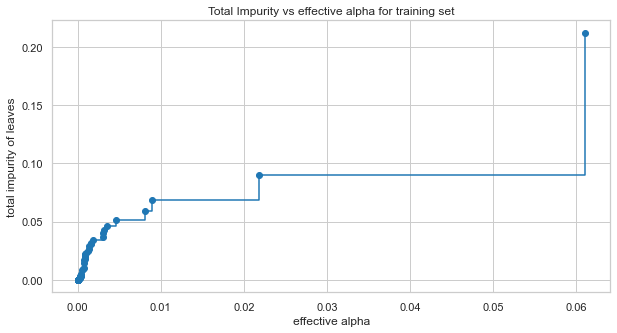

In [114]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [115]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2535013222868624


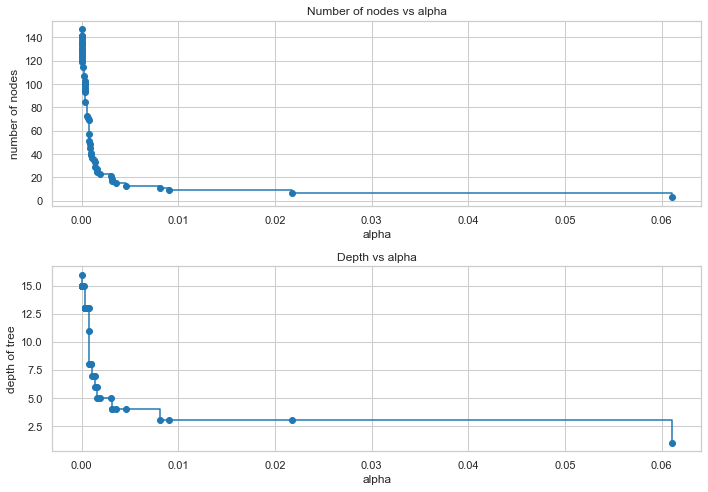

In [116]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [117]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [118]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [119]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

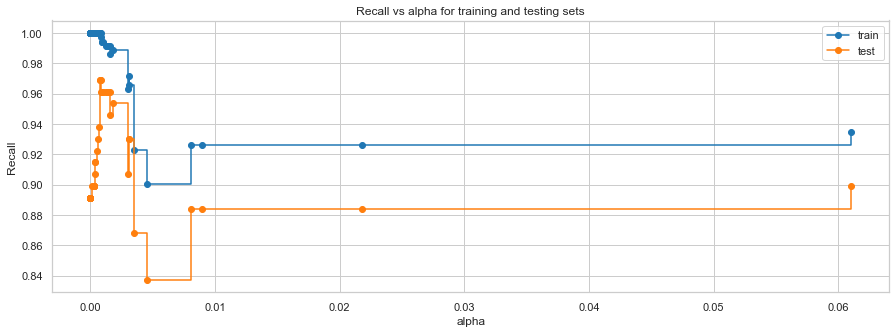

In [120]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

- Maximum value of Recall is at 0.06 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.004 retaining information and getting higher recall.
- From the above visualization , it is very clear that alpha value of 0.004 may be ideal to use

In [121]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000761786285171626,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [122]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000761786285171626,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

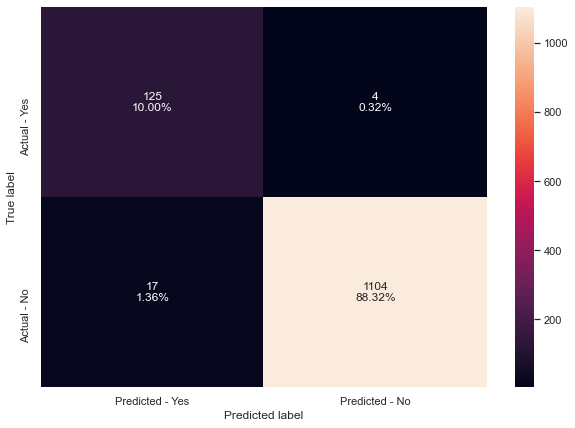

In [123]:
make_confusion_matrix_tree(best_model,y_test)

In [124]:
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.9689922480620154


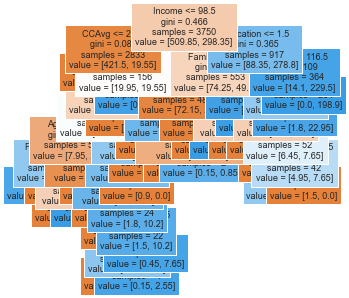

In [125]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [126]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.004,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

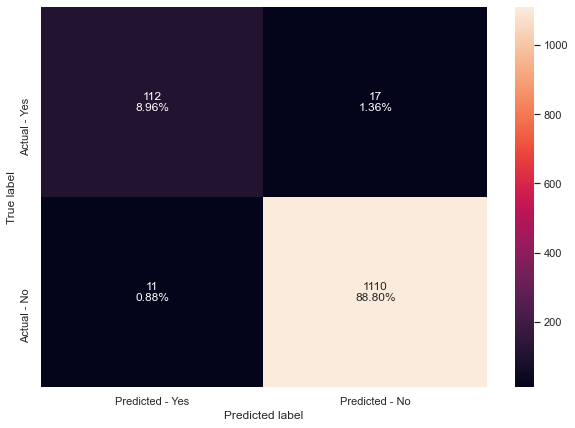

In [127]:
make_confusion_matrix_tree(best_model2,y_test)

In [128]:
get_recall_score(best_model2)

Recall on training set :  0.9230769230769231
Recall on test set :  0.8682170542635659


## Visualizing the Decision Tree

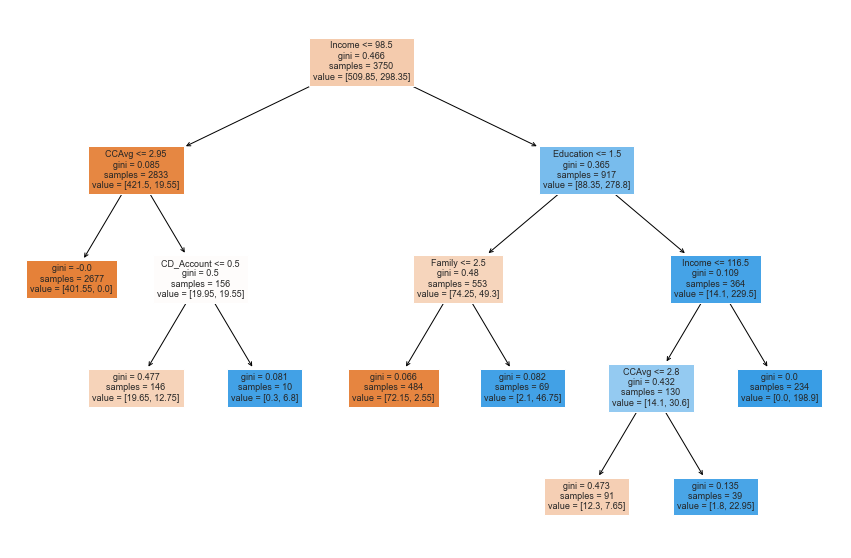

In [129]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [130]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [401.55, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [19.65, 12.75] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.30, 6.80] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [72.15, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.10, 46.75] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- weights: [12.30, 7.65] class: 0
|   |   |   |--- CCAvg >  2.80
|   |   |   |   |--- weights: [1.80, 22.95] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 198.90] class: 1



In [131]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                     Imp
Income             0.626
Family             0.149
Education          0.143
CCAvg              0.071
CD_Account         0.011
Age                0.000
Experience         0.000
ZIPCode            0.000
Mortgage           0.000
Securities_Account 0.000
Online             0.000
CreditCard         0.000


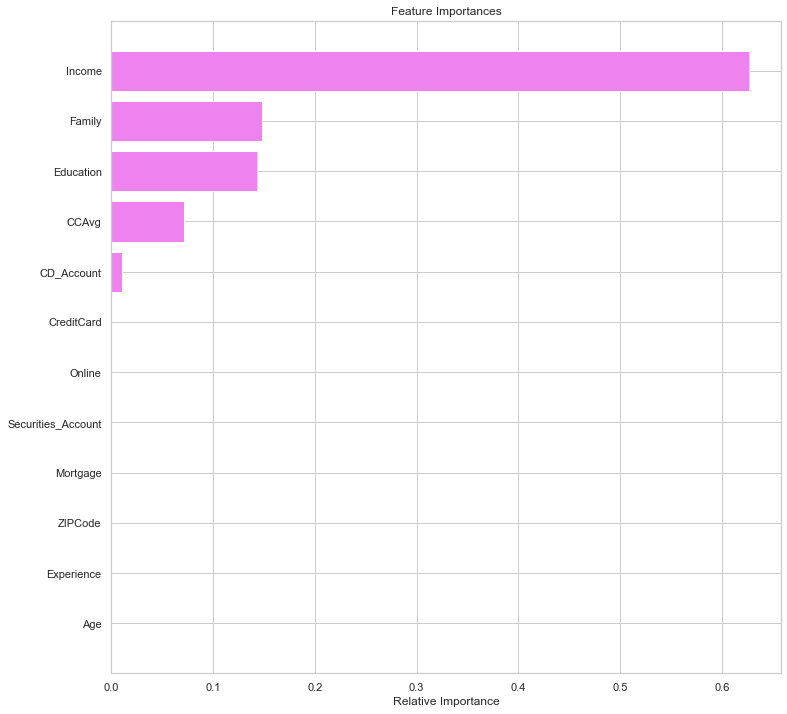

In [132]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [133]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.93,0.92], 'Test_Recall':[0.89,0.86,0.86]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model         1.000        0.890
1  Decision treee with hyperparameter tuning         0.930        0.860
2            Decision tree with post-pruning         0.920        0.860

- Decision tree model with Hyper Parameter has given best recall value

# Misclassified Data Analysis

In [137]:
Y_test = np.asarray(Y_test)
misclassified = np.where(Y_test != model.predict(X_test))
misclassified

(array([  35,   51,  174,  189,  238,  354,  476,  509,  514,  517,  601,
         638,  741,  897,  915,  953,  990, 1128, 1149, 1164, 1176, 1182]),)

In [145]:
for i in misclassified:
    df_misclas = df.iloc[i,:] # selecting row at index position i

In [146]:
df_misclas

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                           
36     48          24      81    92647       3  0.700          1         0   
52     61          37     131    94720       1  2.900          1         0   
175    42          17     168    95503       2  7.900          2         0   
190    55          29     112    94043       2  1.400          1         0   
239    57          32      28    95831       3  0.200          1         0   
355    44          20     173    90277       2  1.400          1       419   
477    60          34      53    92717       1  0.800          2         0   
510    52          28     118    90503       2  6.800          1       112   
515    27           1      74    91730       3  0.300          3         0   
518    54          27      43    92834       3  1.000          2       169   
602    58          32      38    91320       1  1.400          1         0   
639    42          16      35    92054       3  1.500          1         0   
742    61          37      22    94590       1  1.200          3         0   
898    62          37      21    92691       4  0.400          2       137   
916    53          28     184    94550       1  8.100          1       303   
954    51          26      28    92130       4  0.200          2         0   
991    34          10      81    94002       4  3.400          1         0   
1129   30           5     171    94025       2  1.900          2         0   
1150   56          32     158    91763       1  7.400          1         0   
1165   41          17      94    90071       3  3.800          2       327   
1177   29           3     103    90049       4  3.400          1         0   
1183   28           2      19    94720       4  0.400          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                       
36                0                   0           0       0           0  
52                0                   0           0       1           0  
175               1                   0           0       1           0  
190               0                   0           0       1           0  
239               0                   0           0       1           1  
355               0                   0           0       1           0  
477               0                   1           0       0           1  
510               0                   0           0       1           0  
515               0                   0           0       1           0  
518               0                   0           0       0           0  
602               0                   0           0       1           1  
639               0                   0           0       0           0  
742               0                   0           0       1           0  
898               0                   0           0       1           1  
916               0                   0           0       1           0  
954               0                   1           0       1           0  
991               0                   0           0       1           0  
1129              1                   0           0       0           0  
1150              0                   0           0       0           0  
1165              1                   1           1       1           0  
1177              1                   0           0       1           0  
1183              0                   0           0       1           1

- No pattern in the misclassified report.

## Conclusion

- We analyzed the "AllLife Bank" using different techniques , Logistic Regression and Decision Tree Classifier were used to build a predictive model for the same.
- The model built can be used to predict if a customer is going to buy a personal loan or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Income , Education , Family , CC Avg are the most important variable in predicting the customers that will buy a personal loan
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Recommendations

* According to both the models it looks like making customer to buy a product is not an easy task.

* People who does not have mortage can buy a personal loan.

* Family with 1 and 2 people did not take any personal loan , So they are potential customers

* Customer retention - Member Loyalty programs initiatives like special discounts, coupons, etc can be provided.

* Majority of the people with income less than 100K did not take personal loan , So they are potential customers as well.

* Family with income less than 50K , did not take any personal loan. Those people can be targeted too to buy personal loan